# Imports

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt

# Astropy imports
import astropy.units as u
import astropy.constants as c
from astropy.table import QTable
from astropy.table import Table
from astropy.coordinates import Distance
from astroquery.vizier import Vizier


# Other imports
import import_ipynb

# Functions import
from Useful_project_functions import *

import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from Useful_project_functions.ipynb


In [2]:
plt.rcParams.update({'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.titlesize':18, 
                     'axes.grid':True, 'axes.labelsize':14, 'legend.fontsize':14})

# Real Analysis

### Importing/querying data

In [3]:
%%time

catalog = 'J/A+A/664/A175/table4'
columns = ['Plx', 'e_Plx', 'Gmag', 'BPmag', 'RPmag']
Vizier.ROW_LIMIT = -1
catalogue = Vizier.get_catalogs(catalog='J/A+A/664/A175/table4')[0]

Wall time: 10.4 s


In [4]:
cluster_table = QTable([catalogue['GaiaEDR3'], catalogue['Plx'], catalogue['e_Plx'], 
                        catalogue['Gmag'], catalogue['BPmag'], catalogue['RPmag'], 
                        catalogue['Cluster'], catalogue['_RA.icrs'],  catalogue['_DE.icrs']], 
                        names = ['GaiaID', 'Parallax', 'Parallax_error', 'M_apparent', 'G_bp', 
                                 'G_rp', 'Cluster_number', 'RA_ICRS', 'DE_ICRS'])


In [5]:
print(len(cluster_table))

190303


In [20]:
all_iso_data, all_iso_ages = separate_isochrones('Baraffe', '0.00', survey='gaia')


#print(all_iso_data[0]) # age, mass, G, BP-RP

pos = np.where(all_iso_data[0][:, 1]==0.1)[0]
print(pos)

[12]


In [23]:
def max_dist(masses, all_iso_data):
    m = 20.7
    
    max_distances = np.empty((len(all_iso_data), 3)) # Shape: isochrones, masses 
    
    for i, iso_data in enumerate(all_iso_data):
        for j, mass in enumerate(masses):
            mass_pos = np.where(iso_data[:, 1]==mass)[0][0]
            M = iso_data[:, 2][mass_pos]
            max_distances[i, j] = 10*10**((m - M)/5)# * u.pc
    
    return max_distances

In [35]:
print(np.where(all_iso_ages==0.1)[0])

[15]


In [36]:
max_distances_test = max_dist(np.array([0.1, 0.2, 0.3]), all_iso_data)

#print(max_distances_test)

min_01 = max_distances_test[:, 0][15]
min_02 = max_distances_test[:, 1][15]
min_03 = max_distances_test[:, 2][15]

print(min_01, min_02, min_03)

411.3391061524547 838.3010304515518 1213.9477653658287


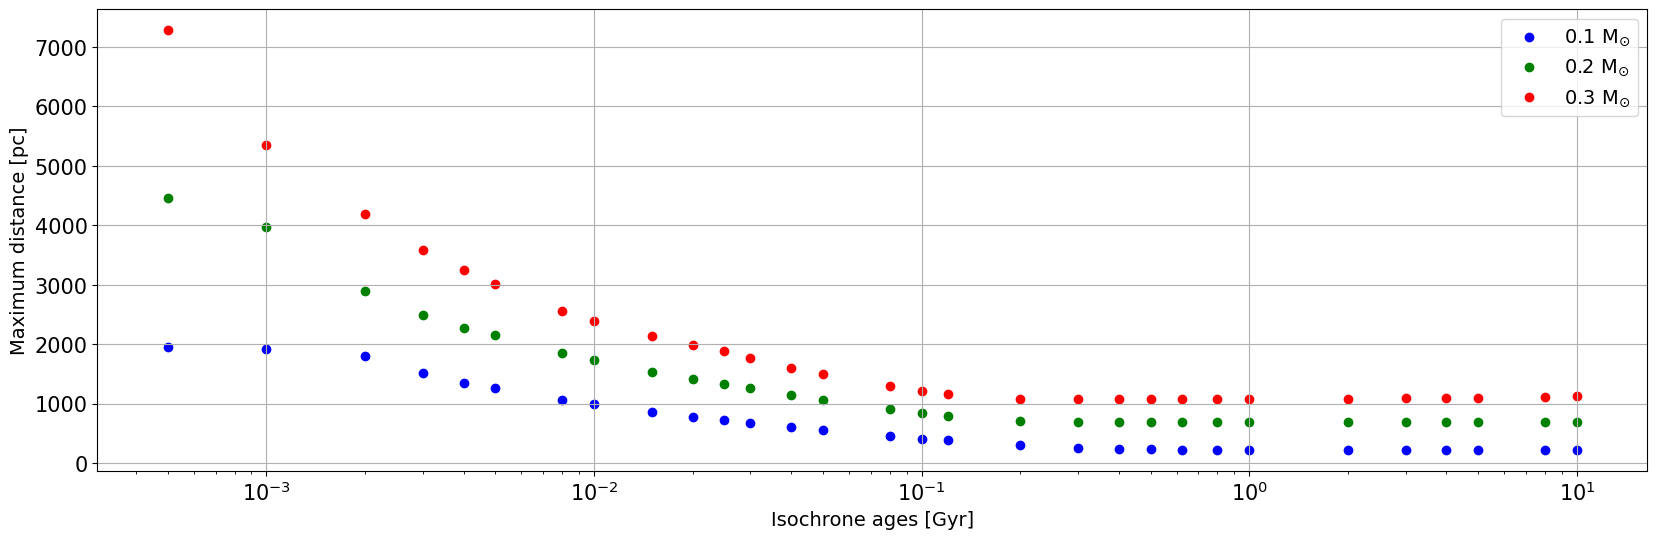

In [32]:
fig001, ax001 = plt.subplots(figsize=(20, 6))


ax001.scatter(all_iso_ages, max_distances_test[:, 0], c='b', label=r'0.1 M$_{\odot}$')
ax001.scatter(all_iso_ages, max_distances_test[:, 1], c='g', label=r'0.2 M$_{\odot}$')
ax001.scatter(all_iso_ages, max_distances_test[:, 2], c='r', label=r'0.3 M$_{\odot}$')


ax001.legend()

ax001.set_xlabel('Isochrone ages [Gyr]')
ax001.set_ylabel('Maximum distance [pc]')

ax001.set_xscale('log')

plt.show()

## Clean sample

In [44]:
%%time

clusters_sep_clean, clusters_names_clean = cluster_list(cluster_table, 500, 'gaia', None, 600)


del clusters_sep_clean[7]
del clusters_sep_clean[4]

del clusters_names_clean[7]
del clusters_names_clean[4]

clusters_n_stars_clean = [len(i) for i in clusters_sep_clean]

clusters_names_float_clean = np.array([float(x) for x in clusters_names_clean])



Wall time: 1.85 s


In [38]:
pos_18 = np.where(clusters_names_float_clean==18.)[0]

pos_74 = np.where(clusters_names_float_clean==74.)[0]

print(pos_18, pos_74)

all_iso_data, all_iso_ages = separate_isochrones('Baraffe', '0.00', survey='gaia')

[4] [7]


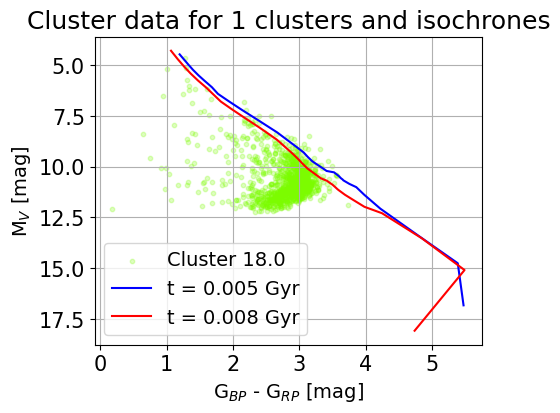

In [39]:
plotting_iso_and_data(all_data=clusters_sep_clean[4:5], all_iso_data=all_iso_data[5:7], 
                      cluster_names=clusters_names_float_clean[4:5], model='Baraffe', 
                      data_alpha=0.25, CMD_or_mass='CMD', survey='gaia')

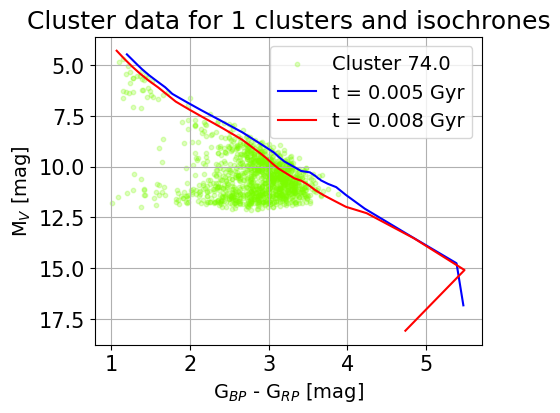

In [40]:
plotting_iso_and_data(all_data=clusters_sep_clean[7:8], all_iso_data=all_iso_data[5:7], 
                      cluster_names=clusters_names_float_clean[7:8], model='MIST', 
                      data_alpha=0.25, CMD_or_mass='CMD', survey='gaia')

In [45]:
print(len(clusters_sep_clean))
print(len(clusters_names_clean))
print(clusters_sep_clean[0].columns)
print()
print(len(clusters_sep_clean))

41
41
<TableColumns names=('GaiaID','Parallax','Parallax_error','M_apparent','G_bp','G_rp','Cluster_number','RA_ICRS','DE_ICRS','dist','dist_error','bp_rp','M_V')>

41


In [46]:
clusters_distances_clean = np.array([cluster['dist'].value[0] for cluster in clusters_sep_clean])
clusters_dist_errs_clean = np.array([cluster['dist_error'].value[0] for cluster in clusters_sep_clean])
print(len(clusters_sep_clean))
print(len(clusters_names_float_clean))
print(len(clusters_distances_clean))
print(len(clusters_dist_errs_clean))

41
41
41
41


411.3391061524547 838.3010304515518 1213.9477653658287

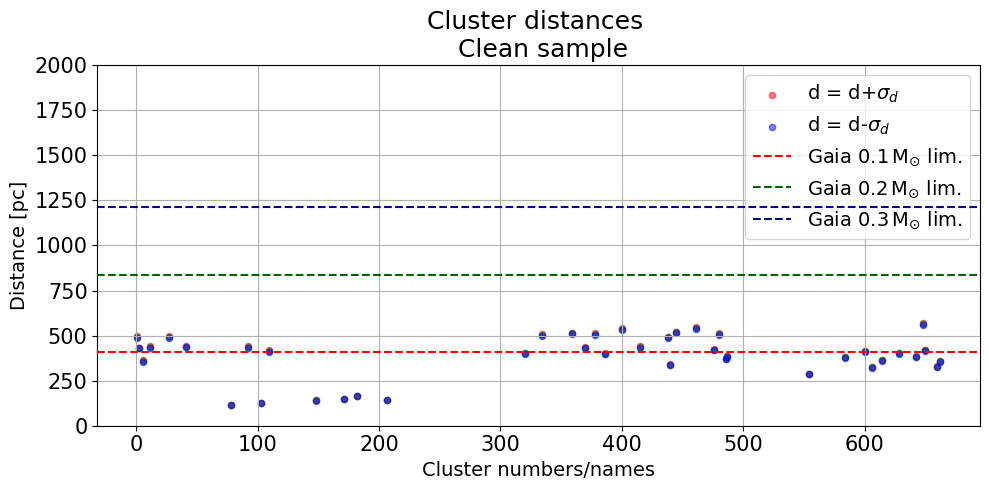

In [47]:
fig01, ax01 = plt.subplots(figsize=(10, 5))

ax01.scatter(clusters_names_float_clean, clusters_distances_clean+clusters_dist_errs_clean, c='r', s=20, alpha=0.5, label=r'd = d+$\sigma_d$') #fc=(0, 0, 1, 0.25)
ax01.scatter(clusters_names_float_clean, clusters_distances_clean, c='g', s=20, alpha=0.5)
ax01.scatter(clusters_names_float_clean, clusters_distances_clean-clusters_dist_errs_clean, c='b', s=20, alpha=0.5, label=r'd = d-$\sigma_d$')

#ax01.errorbar(clusters_names_float, clusters_distances, yerr=clusters_dist_errs, color='b',
#                capsize=2.5, alpha=0.5)

ax01.axhline(411, color='red', linestyle='dashed', label=r'Gaia $0.1 \,$M$_{\odot}$ lim.', zorder=20)

ax01.axhline(838, color='darkgreen', linestyle='dashed', label=r'Gaia $0.2 \,$M$_{\odot}$ lim.', zorder=20)

ax01.axhline(1214, color='darkblue', linestyle='dashed', label=r'Gaia $0.3 \,$M$_{\odot}$ lim.', zorder=20)

ax01.set_xlabel('Cluster numbers/names')
ax01.set_ylabel('Distance [pc]')
ax01.set_title('Cluster distances \n Clean sample')
#ax01.set_xlim(-100, 14900)
ax01.set_ylim(0, 2000)

ax01.legend()



plt.tight_layout()
plt.savefig('Plots/Cluster_distances_clean.png')
plt.show()

**NOTE:**

- From the plot above, I can easily see that the uncertainty increases with the distance from us, which means that the errors become more significant. 

- The lines also say that Gaia can probably not observe any stars with $0.1 \,$M$_{\odot} \leq M_{\star}$ in any of our clusters WITHOUT extinction. It can definetly not observe them with extinction as well. 

- This means that any results from the first interval $0.01 \,$M$_{\odot} \leq M_{\star} \leq 0.08 \,$M$_{\odot}$ are probably totally unreliable

## Baraffe

### Fitting isochrones and interpolating masses

In [48]:
%%time
cluster_log_counts_Baraffe_clean, cluster_log_edges_Baraffe_clean, cluster_masses_Baraffe_clean, cluster_ages_Baraffe_clean, same_as_1st_isochrone_Baraffe_clean, cluster_names_Baraffe_clean = final_IMFs(clusters_sep_clean, clusters_names_float_clean, 'Baraffe', '0.00', 0.2, 
                                                                                                                                                                                                            False, False, False, False, False) #, tmass_clusters_sep

print('Done')

i new = 0
i new = 1
i new = 2
i new = 3
i new = 4
i new = 5
i new = 6
i new = 7
i new = 8
i new = 9
i new = 10
i new = 11
i new = 12
i new = 13
i new = 14
i new = 15
i new = 16
i new = 17
i new = 18
i new = 19
i new = 20
i new = 21
i new = 22
i new = 23
i new = 24
i new = 25
i new = 26
i new = 27
i new = 28
i new = 29
i new = 30
i new = 31
i new = 32
i new = 33
i new = 34
i new = 35
i new = 36
i new = 37
i new = 38
i new = 39
i new = 40
Done
Wall time: 3.02 s


In [23]:
cluster_ages_Baraffe_clean = np.array(cluster_ages_Baraffe_clean)

print(np.shape(cluster_log_edges_Baraffe_clean))
print(np.shape(cluster_log_counts_Baraffe_clean))
print(np.shape(cluster_masses_Baraffe_clean))
print(np.shape(cluster_ages_Baraffe_clean))
print(type(cluster_ages_Baraffe_clean))
print(cluster_names_Baraffe_clean)
print(cluster_ages_Baraffe_clean[4], cluster_ages_Baraffe_clean[7])

(41,)
(41,)
(41,)
(41,)
<class 'numpy.ndarray'>
[  1.   2.   6.  11.  27.  41.  78.  92. 103. 109. 148. 171. 182. 207.
 320. 334. 359. 370. 378. 386. 400. 415. 438. 440. 445. 461. 476. 480.
 486. 487. 554. 584. 600. 606. 614. 628. 642. 648. 650. 660. 662.]
0.026966696669666966 0.03018601860186019


### Fitting slopes to histograms

In [24]:
%%time
cluster_bin_widths_Baraffe_clean, all_cluster_params_Baraffe_clean, cluster_kroupa_diff_Baraffe_clean, single_nonzero_bin_counter_Baraffe_clean = IMF_slopes(cluster_log_edges_Baraffe_clean, cluster_log_counts_Baraffe_clean, 
                                                                                                                                                             cluster_masses_Baraffe_clean, model='Baraffe', intervals='Kroupa', 
                                                                                                                                                             plot=False)

print('Done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Done
Wall time: 52.7 ms


In [25]:
has_slopes_Baraffe_clean = []

slope1_Baraffe_clean = []
slope2_Baraffe_clean = []
slope3_Baraffe_clean = []
slope4_Baraffe_clean = []

for i, cluster_slopes in enumerate(all_cluster_params_Baraffe_clean):
    #isnan_mask = np.isnan(cluster_slopes)==True
    notnan_mask = np.isnan(cluster_slopes[0, :])==False
    
    slope_numbers = np.array([1, 2, 3, 4])
    which_slopes = slope_numbers[notnan_mask]
    
    has_slopes_Baraffe_clean.append(which_slopes)
    
    if any(which_slopes==1):
        slope1_Baraffe_clean.append(i)
        
    if any(which_slopes==2):
        slope2_Baraffe_clean.append(i)
        
    if any(which_slopes==3):
        slope3_Baraffe_clean.append(i)
        
    if any(which_slopes==4):
        slope4_Baraffe_clean.append(i)

In [14]:
#%%time
#densities_baraffe = np.empty((len(clusters_sep), 3))
#
#for i, cluster in enumerate(clusters_sep):
#    densities_i = density(clusters_sep[i]['RA_ICRS'], clusters_sep[i]['DE_ICRS'],
#                              clusters_sep[i]['dist'], clusters_names[i], False, False)
#    
#    
#    #print(type(densities_i))
#    #print(densities_i)
#    densities_baraffe[i, :] = densities_i

In [15]:
#densities_baraffe_table = Table(densities_baraffe, names=['90_percent', '75_percent', '50_percent'])

#densities_baraffe_table.write('densities_baraffe_table_more.txt', format='ascii', overwrite=True)

## MIST

In [16]:
#%%time

#clusters_sep_MIST_clean, clusters_names_MIST_clean = cluster_list(cluster_table, 500, 'gaia', None, 600)


#clusters_names_float_MIST_clean = np.array([float(x) for x in clusters_names_MIST_clean])
#print(len(clusters_sep_MIST_clean))
#print(clusters_sep_MIST_clean[0].columns)

### Fitting isochrones and interpolating masses

In [26]:
%%time
cluster_log_counts_MIST_clean, cluster_log_edges_MIST_clean, cluster_masses_MIST_clean, cluster_ages_MIST_clean, same_as_1st_iso_MIST_clean, cluster_names_MIST_clean = final_IMFs(clusters_sep_clean, clusters_names_float_clean, 'MIST', '0.00', 0.2, 
                                                                                                                                                                                     False, False, False, False, False) #tmass_clusters_sep, 

print('Done')

i new = 0
i new = 1
i new = 2
i new = 3
i new = 4
i new = 5
i new = 6
i new = 7
i new = 8
i new = 9
i new = 10
i new = 11
i new = 12
i new = 13
i new = 14
i new = 15
i new = 16
i new = 17
i new = 18
i new = 19
i new = 20
i new = 21
i new = 22
i new = 23
i new = 24
i new = 25
i new = 26
i new = 27
i new = 28
i new = 29
i new = 30
i new = 31
i new = 32
i new = 33
i new = 34
i new = 35
i new = 36
i new = 37
i new = 38
i new = 39
i new = 40
Done
Wall time: 13.1 s


In [27]:
cluster_ages_MIST_clean = np.array(cluster_ages_MIST_clean)

print(np.shape(cluster_log_edges_MIST_clean))
print(np.shape(cluster_log_counts_MIST_clean))
print(np.shape(cluster_masses_MIST_clean))
print(np.shape(cluster_ages_MIST_clean))
print(type(cluster_ages_MIST_clean))

(41,)
(41,)
(41,)
(41,)
<class 'numpy.ndarray'>


### Fitting slopes to histograms

In [28]:
%%time
cluster_bin_widths_MIST_clean, all_cluster_params_MIST_clean, cluster_kroupa_diff_MIST_clean, single_nonzero_bin_counter_MIST_clean = IMF_slopes(cluster_log_edges_MIST_clean, cluster_log_counts_MIST_clean, 
                                                                                                                                                 cluster_masses_MIST_clean, model='MIST', intervals='Kroupa', 
                                                                                                                                                 plot=False)

print('Done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Done
Wall time: 52.1 ms


In [29]:
has_slopes_MIST_clean = []

slope1_MIST_clean = []
slope2_MIST_clean = []
slope3_MIST_clean = []
slope4_MIST_clean = []

for i, cluster_slopes in enumerate(all_cluster_params_MIST_clean):
    #isnan_mask = np.isnan(cluster_slopes)==True
    notnan_mask = np.isnan(cluster_slopes[0, :])==False
    
    slope_numbers = np.array([1, 2, 3, 4])
    which_slopes = slope_numbers[notnan_mask]
    
    has_slopes_MIST_clean.append(which_slopes)
    
    if any(which_slopes==1):
        slope1_MIST_clean.append(i)
        
    if any(which_slopes==2):
        slope2_MIST_clean.append(i)
        
    if any(which_slopes==3):
        slope3_MIST_clean.append(i)
        
    if any(which_slopes==4):
        slope4_MIST_clean.append(i)

In [30]:
print(slope4_MIST_clean)
print(slope4_Baraffe_clean)

print()

print(all_cluster_params_Baraffe_clean.shape)
print(all_cluster_params_MIST_clean.shape)

[0, 1, 5, 6, 8, 14, 17, 18, 20, 22, 24, 32, 33, 35, 37, 38]
[40]

(41, 2, 4)
(41, 2, 4)


In [20]:
#%%time
#densities_MIST = np.empty((len(clusters_sep_MIST), 3))
#
#for i, cluster in enumerate(clusters_sep_MIST):
#    densities_MIST_i = density(clusters_sep_MIST[i]['RA_ICRS'], clusters_sep_MIST[i]['DE_ICRS'],
#                              clusters_sep_MIST[i]['dist'], clusters_names_MIST[i], False, False)
#    
#    
#    #print(type(densities_i))
#    #print(densities_i)
#    densities_MIST[i, :] = densities_MIST_i

In [21]:
#densities_MIST_table = Table(densities_MIST, names=['90_percent', '75_percent', '50_percent'])

#densities_MIST_table.write('densities_MIST_table_more.txt', format='ascii', overwrite=True)

In [31]:
interval_slopes_Baraffe_clean = []
interval_star_numbers_Baraffe_clean = []
interval_cluster_ages_Baraffe_clean = []

interval_slopes_MIST_clean = []
interval_star_numbers_MIST_clean = []
interval_cluster_ages_MIST_clean = []

for i in range(4):
    #print(i)
    slope_mask_Baraffe = np.isnan(all_cluster_params_Baraffe_clean[:, 0, i])==False
    interval_slopes_Baraffe_clean.append(all_cluster_params_Baraffe_clean[:, 0, i][slope_mask_Baraffe])
    n_cluster_stars_Baraffe = np.array([len(cluster_masses_Baraffe_clean[i]) for i in range(len(cluster_masses_Baraffe_clean))])
    n_cluster_stars_Baraffe = n_cluster_stars_Baraffe[slope_mask_Baraffe]
    interval_star_numbers_Baraffe_clean.append(n_cluster_stars_Baraffe)
    int_cluster_ages_Baraffe = cluster_ages_Baraffe_clean[slope_mask_Baraffe]
    interval_cluster_ages_Baraffe_clean.append( int_cluster_ages_Baraffe)
    
    slope_mask_MIST = np.isnan(all_cluster_params_MIST_clean[:, 0, i])==False
    interval_slopes_MIST_clean.append(all_cluster_params_MIST_clean[:, 0, i][slope_mask_MIST])
    n_cluster_stars_MIST = np.array([len(cluster_masses_MIST_clean[i]) for i in range(len(cluster_masses_MIST_clean))])
    n_cluster_stars_MIST = n_cluster_stars_MIST[slope_mask_MIST]
    interval_star_numbers_MIST_clean.append(n_cluster_stars_MIST)
    int_cluster_ages_MIST = cluster_ages_MIST_clean[slope_mask_MIST]
    interval_cluster_ages_MIST_clean.append( int_cluster_ages_MIST)


kroupa_slopes = np.array([0.3, -1.3, -2.3, -2.3])
kroupa_slope_errors = np.array([0.7, 0.5, 0.3, 0.7])



interval_edges = [(0.01, 0.08), (0.08, 0.5), (0.5, 1.0), (1.0, )]
#print(kroupa_slopes[0])

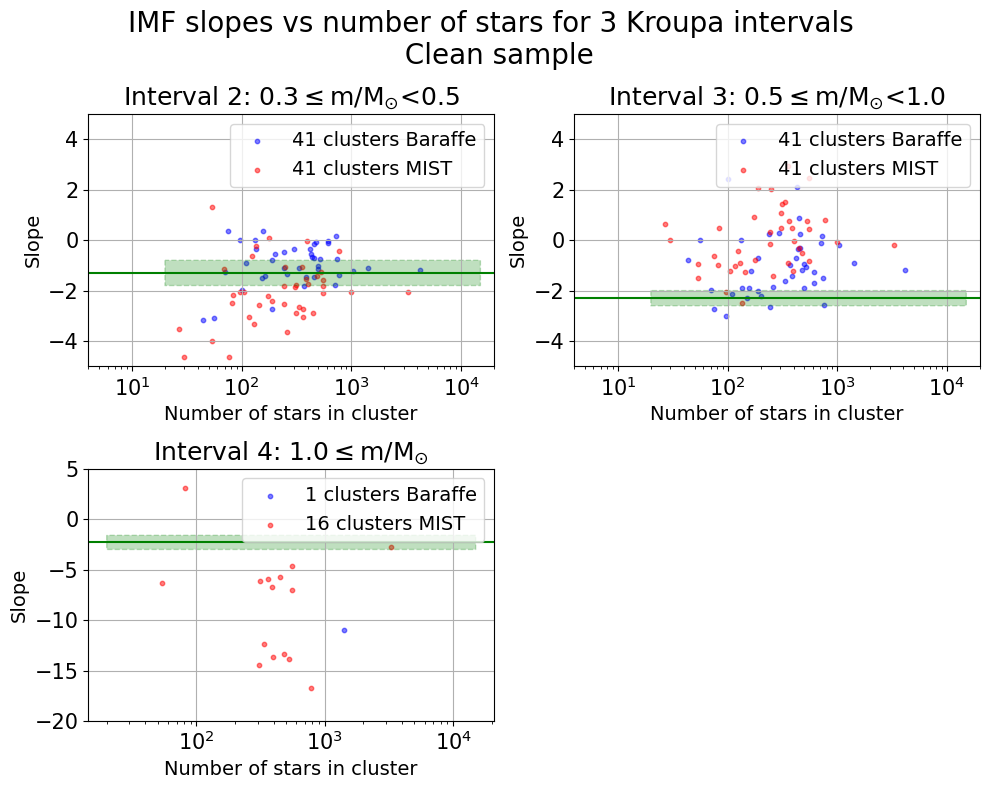

In [134]:
fig1, ax1 = plt.subplots(2, 2, figsize=(10, 8))

fig1.suptitle('IMF slopes vs number of stars for 3 Kroupa intervals \n Clean sample', fontsize=20)

colours = ['r', 'g', 'b', 'orange']



ax1[0, 0].scatter(interval_star_numbers_Baraffe_clean[1], interval_slopes_Baraffe_clean[1], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe_clean[1])} clusters Baraffe')
ax1[0, 0].scatter(interval_star_numbers_MIST_clean[1], interval_slopes_MIST_clean[1], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST_clean[1])} clusters MIST')
    
ax1[0, 0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax1[0, 0].fill_between(np.linspace(20, 15000, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax1[0, 0].set_xlabel('Number of stars in cluster')
ax1[0, 0].set_ylabel('Slope')
ax1[0, 0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}')
ax1[0, 0].set_xlim(4e0, 2e4)
ax1[0, 0].set_ylim(-5, 5)

ax1[0, 0].legend()
ax1[0, 0].set_xscale('log')




ax1[0, 1].scatter(interval_star_numbers_Baraffe_clean[2], interval_slopes_Baraffe_clean[2], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe_clean[2])} clusters Baraffe')
ax1[0, 1].scatter(interval_star_numbers_MIST_clean[2], interval_slopes_MIST_clean[2], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST_clean[2])} clusters MIST')
    
ax1[0, 1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax1[0, 1].fill_between(np.linspace(20, 15000, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax1[0, 1].set_xlabel('Number of stars in cluster')
ax1[0, 1].set_ylabel('Slope')
ax1[0, 1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
ax1[0, 1].set_xlim(4e0, 2e4)
ax1[0, 1].set_ylim(-5, 5)

ax1[0, 1].legend()
ax1[0, 1].set_xscale('log')
#ax1[1, 0].set_ylim(ymin=kroupa_slopes[2]-0.5, ymax=kroupa_slopes[2]+0.5)



ax1[1, 0].scatter(interval_star_numbers_Baraffe_clean[3], interval_slopes_Baraffe_clean[3], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe_clean[3])} clusters Baraffe')
ax1[1, 0].scatter(interval_star_numbers_MIST_clean[3], interval_slopes_MIST_clean[3], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST_clean[3])} clusters MIST')
    
ax1[1, 0].axhline(kroupa_slopes[3], linestyle='solid', color='g')
ax1[1, 0].fill_between(np.linspace(20, 15000, 100000), kroupa_slopes[3]-kroupa_slope_errors[3],
                     kroupa_slopes[3]+kroupa_slope_errors[3], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax1[1, 0].set_xlabel('Number of stars in cluster')
ax1[1, 0].set_ylabel('Slope')
ax1[1, 0].set_title(f'Interval 4: '+f'{interval_edges[3][0]}'+r'$\leq$m/'+r'M$_{\odot}$')
ax1[1, 0].set_ylim(-20, 5)

ax1[1, 0].legend()
ax1[1, 0].set_xscale('log')


ax1[1, 1].remove()


plt.tight_layout()
#plt.savefig('Plots/Slopes_vs_number_of_stars_clean.png')
plt.show()

In [35]:
clusters_names_float_MIST_clean = np.array([float(x) for x in cluster_names_MIST_clean])
clusters_names_float_Baraffe_clean = np.array([float(x) for x in cluster_names_Baraffe_clean])

print(len(clusters_names_float_MIST_clean))
print(len(cluster_ages_MIST_clean))

print(len(clusters_names_float_Baraffe_clean))
print(len(cluster_ages_Baraffe_clean))

41
41
41
41


In [36]:
Baraffe_MIST_intersection_clean, baraffe_inds_clean, mist_inds_clean = np.intersect1d(clusters_names_float_Baraffe_clean, clusters_names_float_MIST_clean, return_indices=True)

print(len(Baraffe_MIST_intersection_clean))

41


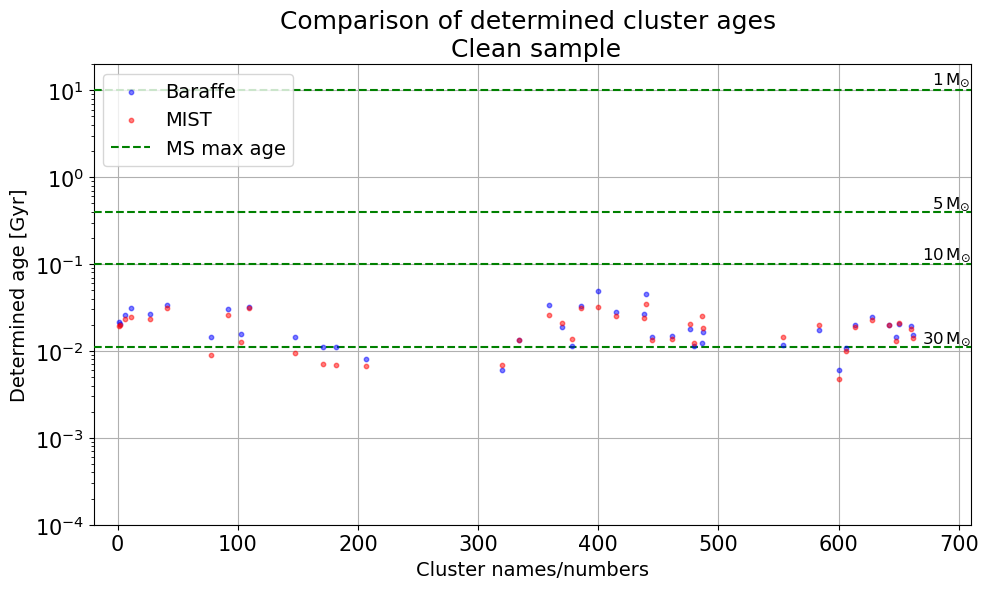

In [171]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))

ax2.scatter(clusters_names_float_Baraffe_clean, cluster_ages_Baraffe_clean, color='b', s=10, 
               alpha=0.5, label='Baraffe', zorder=10)
ax2.scatter(clusters_names_float_MIST_clean, cluster_ages_MIST_clean, color='r', s=10, 
               alpha=0.5, label='MIST', zorder=10)

ax2.set_xlabel('Cluster names/numbers')
ax2.set_ylabel('Determined age [Gyr]')
ax2.set_title('Comparison of determined cluster ages \n Clean sample')


ax2.set_yscale('log')
#ax2.set_ylim(3e-3, 2e1)
ax2.set_ylim(1e-4, 2e1)
ax2.set_xlim(-20, 710)

ax2.axhline(10, color='g', linestyle='dashed', zorder=5, label='MS max age') # In Gyr
ax2.text(678, 12, r'$1 \,$M$_{\odot}$', fontsize=12)

ax2.axhline(0.4, color='g', linestyle='dashed', zorder=5)
ax2.text(678, 0.45, r'$5 \,$M$_{\odot}$', fontsize=12)

ax2.axhline(0.1, color='g', linestyle='dashed', zorder=5)
ax2.text(669.25, 0.115, r'$10 \,$M$_{\odot}$', fontsize=12)

ax2.axhline(11e-3, color='g', linestyle='dashed', zorder=5)
ax2.text(669.25, 0.0125, r'$30 \,$M$_{\odot}$', fontsize=12)

ax2.legend(loc='upper left')


#ax2[1].remove()
#ax2[1].scatter(cluster_ages_Baraffe_clean[baraffe_inds_clean], 
#               cluster_ages_Baraffe_clean[baraffe_inds_clean], color='b', s=10, alpha=0.5, label='Baraffe')
#ax2[1].scatter(cluster_ages_Baraffe_clean[baraffe_inds_clean], 
#               cluster_ages_MIST_clean, color='r', s=10, alpha=0.5, label='MIST')


#ax2[1].set_xlabel('Cluster ages Baraffe')
#ax2[1].set_ylabel('Determined age [Gyr]')
#ax2[1].set_title('Comparison of determined cluster ages \n Clean sample')

#ax2[1].legend()
#ax2[1].set_yscale('log')
#ax2[1].set_ylim(9e-5, 8e-1)
#ax2[1].set_xlim(-0.003, 0.15)


plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('Plots/Determined_ages_clean.png')
plt.show()

**NOTE:**

- The absolute majority of the clusters are younger tha any of the plotted age limits, which means that the sample is probably fairly complete with high-mass stars below $10 \,$M$_{\odot}$

- It is slightly less complete if the ages from the MIST isochrones are more accurate

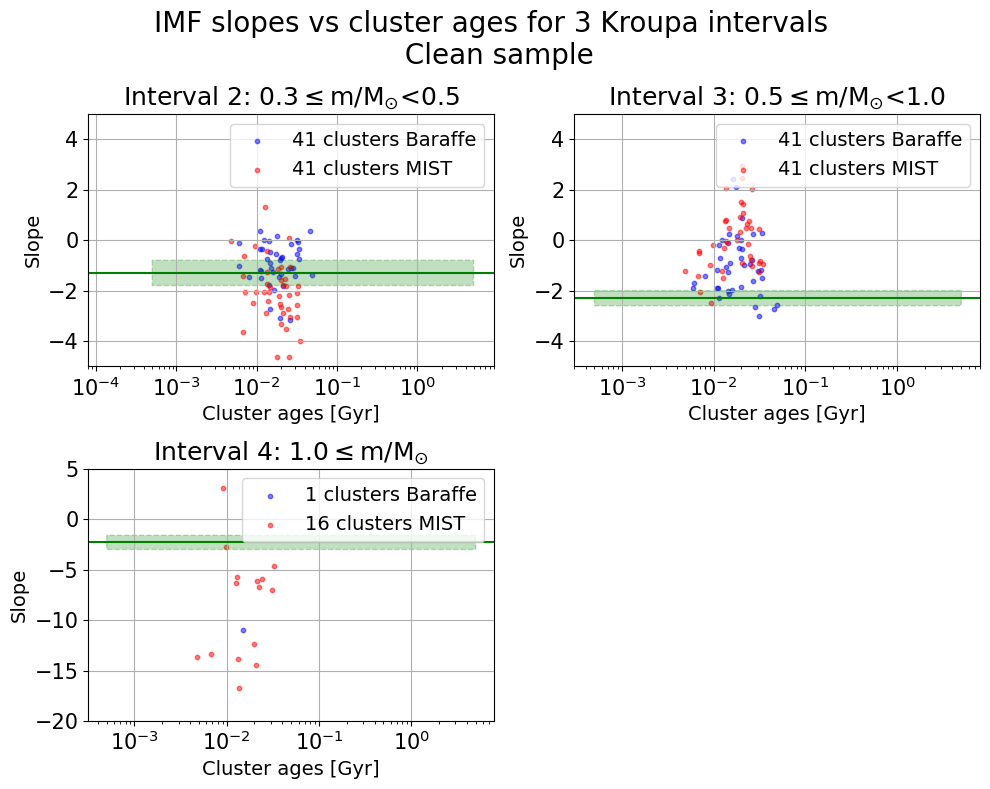

In [138]:
fig3, ax3 = plt.subplots(2, 2, figsize=(10, 8))

fig3.suptitle('IMF slopes vs cluster ages for 3 Kroupa intervals \n Clean sample', fontsize=20)

colours = ['r', 'g', 'b', 'orange']

ax3[0, 0].scatter(interval_cluster_ages_Baraffe_clean[1], interval_slopes_Baraffe_clean[1], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe_clean[1])} clusters Baraffe')
ax3[0, 0].scatter(interval_cluster_ages_MIST_clean[1], interval_slopes_MIST_clean[1], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST_clean[1])} clusters MIST')
    
ax3[0, 0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax3[0, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax3[0, 0].set_xlabel('Cluster ages [Gyr]')
ax3[0, 0].set_ylabel('Slope')
ax3[0, 0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}') #interval_edges[1][0]
ax3[0, 0].set_xlim(8e-5, 9e0)
ax3[0, 0].set_ylim(-5, 5)

ax3[0, 0].legend()
ax3[0, 0].set_xscale('log')




ax3[0, 1].scatter(interval_cluster_ages_Baraffe_clean[2], interval_slopes_Baraffe_clean[2], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe_clean[2])} clusters Baraffe')
ax3[0, 1].scatter(interval_cluster_ages_MIST_clean[2], interval_slopes_MIST_clean[2], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST_clean[2])} clusters MIST')
    
ax3[0, 1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax3[0, 1].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax3[0, 1].set_xlabel('Cluster ages [Gyr]')
ax3[0, 1].set_ylabel('Slope')
ax3[0, 1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
ax3[0, 1].set_xlim(3e-4, 8e0)
ax3[0, 1].set_ylim(-5, 5)

ax3[0, 1].legend()
ax3[0, 1].set_xscale('log')
#ax3[1, 0].set_ylim(ymin=kroupa_slopes[2]-0.5, ymax=kroupa_slopes[2]+0.5)




ax3[1, 0].scatter(interval_cluster_ages_Baraffe_clean[3], interval_slopes_Baraffe_clean[3], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe_clean[3])} clusters Baraffe')
ax3[1, 0].scatter(interval_cluster_ages_MIST_clean[3], interval_slopes_MIST_clean[3], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST_clean[3])} clusters MIST')
    
ax3[1, 0].axhline(kroupa_slopes[3], linestyle='solid', color='g')
ax3[1, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[3]-kroupa_slope_errors[3],
                     kroupa_slopes[3]+kroupa_slope_errors[3], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax3[1, 0].set_xlabel('Cluster ages [Gyr]')
ax3[1, 0].set_ylabel('Slope')
ax3[1, 0].set_title(f'Interval 4: '+f'{interval_edges[3][0]}'+r'$\leq$m/'+r'M$_{\odot}$')
ax3[1, 0].set_ylim(-20, 5)

ax3[1, 0].legend()
ax3[1, 0].set_xscale('log')


ax3[1, 1].remove()


plt.tight_layout()
#plt.savefig('Plots/Slopes_vs_cluster_ages_clean.png')
plt.show()

### Density calculations

In [41]:
clusters_names_float_clean = np.array([float(name) for name in clusters_names_clean])
cluster_names_Baraffe_float_clean = np.array([float(name) for name in cluster_names_Baraffe_clean])

cluster_names_MIST_float_clean = np.array([float(name) for name in cluster_names_MIST_clean])

In [42]:
names_intersection_Baraffe_clean, before_inds_Baraffe_clean, after_inds_Baraffe_clean = np.intersect1d(clusters_names_float_clean, 
                                                                                                       cluster_names_Baraffe_float_clean, 
                                                                                                       return_indices=True)

print(len(names_intersection_Baraffe_clean))

names_intersection_MIST_clean, before_inds_MIST_clean, after_inds_MIST_clean = np.intersect1d(clusters_names_float_clean, 
                                                                                              cluster_names_MIST_float_clean, 
                                                                                              return_indices=True)

print(len(names_intersection_MIST_clean))

#print(clusters_names_float)
#print(cluster_names_Baraffe_float)
#print()
#print(before_inds_Baraffe)
#print(after_inds_Baraffe)
#print()
#print(before_inds_MIST)
#print(after_inds_MIST)

41
41


In [43]:
baraffe_densities_table_clean = Table.read('densities_baraffe_table_clean.txt', delimiter=' ', format='ascii')
MIST_densities_table_clean = Table.read('densities_MIST_table_clean.txt', delimiter=' ', format='ascii')

#print(baraffe_densities_table_clean)
#print(MIST_densities_table_clean)

In [44]:
before_inds_Baraffe_clean = before_inds_Baraffe_clean[before_inds_Baraffe_clean.argsort()]
before_inds_MIST_clean = before_inds_MIST_clean[before_inds_MIST_clean.argsort()]
#print(before_inds_Baraffe)
#print(before_inds_MIST)

In [45]:
dens_baraffe_clean = baraffe_densities_table_clean.copy()
dens_MIST_clean = MIST_densities_table_clean.copy()

dens_90_baraffe_clean = dens_baraffe_clean['90_percent'][before_inds_Baraffe_clean]
dens_75_baraffe_clean = dens_baraffe_clean['75_percent'][before_inds_Baraffe_clean]
dens_50_baraffe_clean = dens_baraffe_clean['50_percent'][before_inds_Baraffe_clean]


dens_90_MIST_clean = dens_MIST_clean['90_percent'][before_inds_MIST_clean]
dens_75_MIST_clean = dens_MIST_clean['75_percent'][before_inds_MIST_clean]
dens_50_MIST_clean = dens_MIST_clean['50_percent'][before_inds_MIST_clean]



max_age_baraffe_clean = np.max(cluster_ages_Baraffe_clean)
min_age_baraffe_clean = np.min(cluster_ages_Baraffe_clean)

max_age_MIST_clean = np.max(cluster_ages_MIST_clean)
min_age_MIST_clean = np.min(cluster_ages_MIST_clean)

print(len(dens_90_baraffe_clean))

41


In [46]:
bin_width = 0.1


nbins_baraffe_clean = int(np.round(2*(np.log10(max_age_baraffe_clean) - np.log10(min_age_baraffe_clean))/bin_width))
nbins_MIST_clean = int(np.round(2*(np.log10(max_age_MIST_clean) - np.log10(min_age_MIST_clean))/bin_width))


bin_edges_baraffe_clean = np.logspace(np.log10(min_age_baraffe_clean), np.log10(max_age_baraffe_clean), 2*(nbins_baraffe_clean+1))
bin_edges_MIST_clean = np.logspace(np.log10(min_age_MIST_clean), np.log10(max_age_MIST_clean), 2*(nbins_MIST_clean+1))


edges_even_baraffe_clean = bin_edges_baraffe_clean[1::2]
edges_odd_baraffe_clean = bin_edges_baraffe_clean[0::2]
edges_even_MIST_clean = bin_edges_MIST_clean[1::2]
edges_odd_MIST_clean = bin_edges_MIST_clean[0::2]

bin_mid_odd_baraffe_clean = edges_even_baraffe_clean[:-1]
bin_mid_even_baraffe_clean = edges_odd_baraffe_clean[1:]

bin_mid_odd_MIST_clean = edges_even_MIST_clean[:-1]
bin_mid_even_MIST_clean = edges_odd_MIST_clean[1:]

print(len(bin_mid_odd_baraffe_clean))
print(len(bin_mid_even_baraffe_clean))

print(len(bin_mid_odd_MIST_clean))
print(len(bin_mid_even_MIST_clean))

18
18
17
17


In [47]:
average_90_density_baraffe_clean = []
average_75_density_baraffe_clean = []
average_50_density_baraffe_clean = []
all_bin_mids_baraffe_clean = []

for i in range(len(bin_mid_odd_baraffe_clean)):
    all_bin_mids_baraffe_clean.append(bin_mid_odd_baraffe_clean[i])
    all_bin_mids_baraffe_clean.append(bin_mid_even_baraffe_clean[i])
    
    odd_age_mask_baraffe = (edges_odd_baraffe_clean[i]<=cluster_ages_Baraffe_clean)&(cluster_ages_Baraffe_clean<edges_odd_baraffe_clean[i+1])
    even_age_mask_baraffe = (edges_even_baraffe_clean[i]<=cluster_ages_Baraffe_clean)&(cluster_ages_Baraffe_clean<edges_even_baraffe_clean[i+1])
    
    densities_90_odd_baraffe = dens_90_baraffe_clean[odd_age_mask_baraffe]
    average_odd_90_density_baraffe = np.mean(densities_90_odd_baraffe)
    average_90_density_baraffe_clean.append(average_odd_90_density_baraffe)
    
    densities_90_even_baraffe = dens_90_baraffe_clean[even_age_mask_baraffe]
    average_even_90_density_baraffe = np.mean(densities_90_even_baraffe)
    average_90_density_baraffe_clean.append(average_even_90_density_baraffe)
    
    
    densities_75_odd_baraffe = dens_75_baraffe_clean[odd_age_mask_baraffe]
    average_odd_75_density_baraffe = np.mean(densities_75_odd_baraffe)
    average_75_density_baraffe_clean.append(average_odd_75_density_baraffe)
    
    densities_75_even_baraffe = dens_75_baraffe_clean[even_age_mask_baraffe]
    average_even_75_density_baraffe = np.mean(densities_75_even_baraffe)
    average_75_density_baraffe_clean.append(average_even_75_density_baraffe)
    
    
    densities_50_odd_baraffe = dens_50_baraffe_clean[odd_age_mask_baraffe]
    average_odd_50_density_baraffe = np.mean(densities_50_odd_baraffe)
    average_50_density_baraffe_clean.append(average_odd_50_density_baraffe)
    
    densities_50_even_baraffe = dens_50_baraffe_clean[even_age_mask_baraffe]
    average_even_50_density_baraffe = np.mean(densities_50_even_baraffe)
    average_50_density_baraffe_clean.append(average_even_50_density_baraffe)

In [48]:
print(len(average_50_density_baraffe_clean))

36


In [49]:
average_90_density_MIST_clean = []
average_75_density_MIST_clean = []
average_50_density_MIST_clean = []
all_bin_mids_MIST_clean = []

for i in range(len(bin_mid_odd_MIST_clean)):
    all_bin_mids_MIST_clean.append(bin_mid_odd_MIST_clean[i])
    all_bin_mids_MIST_clean.append(bin_mid_even_MIST_clean[i])
    
    odd_age_mask = (edges_odd_MIST_clean[i]<=cluster_ages_MIST_clean)&(cluster_ages_MIST_clean<edges_odd_MIST_clean[i+1])
    even_age_mask = (edges_even_MIST_clean[i]<=cluster_ages_MIST_clean)&(cluster_ages_MIST_clean<edges_even_MIST_clean[i+1])
    
    densities_90_odd = dens_90_MIST_clean[odd_age_mask]
    average_odd_90_density = np.mean(densities_90_odd)
    densities_75_odd = dens_75_MIST_clean[odd_age_mask]
    average_odd_75_density = np.mean(densities_75_odd)
    densities_50_odd = dens_50_MIST_clean[odd_age_mask]
    average_odd_50_density = np.mean(densities_50_odd)
    
    densities_90_even = dens_90_MIST_clean[even_age_mask]
    average_even_90_density = np.mean(densities_90_even)
    densities_75_even = dens_75_MIST_clean[even_age_mask]
    average_even_75_density = np.mean(densities_75_even)
    densities_50_even = dens_50_MIST_clean[even_age_mask]
    average_even_50_density = np.mean(densities_50_even)
    
    average_90_density_MIST_clean.append(average_odd_90_density)
    average_90_density_MIST_clean.append(average_even_90_density)
    
    average_75_density_MIST_clean.append(average_odd_75_density)
    average_75_density_MIST_clean.append(average_even_75_density)
    
    average_50_density_MIST_clean.append(average_odd_50_density)
    average_50_density_MIST_clean.append(average_even_50_density)

In [50]:
print(len(average_50_density_MIST_clean))

34


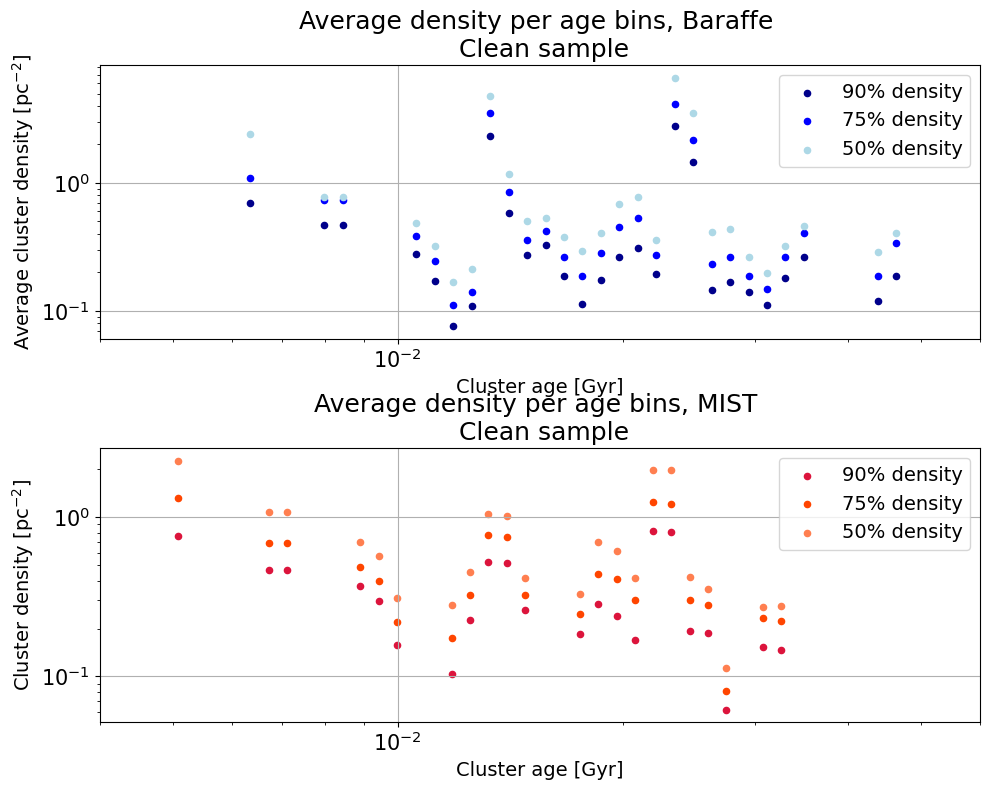

In [139]:
fig4, ax4 = plt.subplots(2, 1, figsize=(10, 8))


ax4[0].scatter(all_bin_mids_baraffe_clean, average_90_density_baraffe_clean, c='darkblue', s=20, alpha=1, 
              label='90% density')
ax4[0].scatter(all_bin_mids_baraffe_clean, average_75_density_baraffe_clean, c='blue', s=20, alpha=1, 
              label='75% density')
ax4[0].scatter(all_bin_mids_baraffe_clean, average_50_density_baraffe_clean, c='lightblue', s=20, alpha=1, 
              label='50% density')

    
ax4[0].set_xlabel('Cluster age [Gyr]')
ax4[0].set_ylabel(r'Average cluster density [pc$^{-2}$]')
ax4[0].set_title('Average density per age bins, Baraffe \n Clean sample')

ax4[0].set_xlim(4e-3, 6e-2)
ax4[0].set_yscale('log')
ax4[0].set_xscale('log')

ax4[0].legend()





ax4[1].scatter(all_bin_mids_MIST_clean, average_90_density_MIST_clean, c='crimson', s=20, alpha=1, 
              label='90% density')
ax4[1].scatter(all_bin_mids_MIST_clean, average_75_density_MIST_clean, c='orangered', s=20, alpha=1, 
              label='75% density')
ax4[1].scatter(all_bin_mids_MIST_clean, average_50_density_MIST_clean, c='coral', s=20, alpha=1, 
              label='50% density')


ax4[1].set_xlabel('Cluster age [Gyr]')
ax4[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax4[1].set_title('Average density per age bins, MIST \n Clean sample')

ax4[1].set_xlim(4e-3, 6e-2)
ax4[1].set_yscale('log')
ax4[1].set_xscale('log')

ax4[1].legend()




plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('Plots/Cluster_density_vs_age_hand_hist_clean.png')
plt.show()

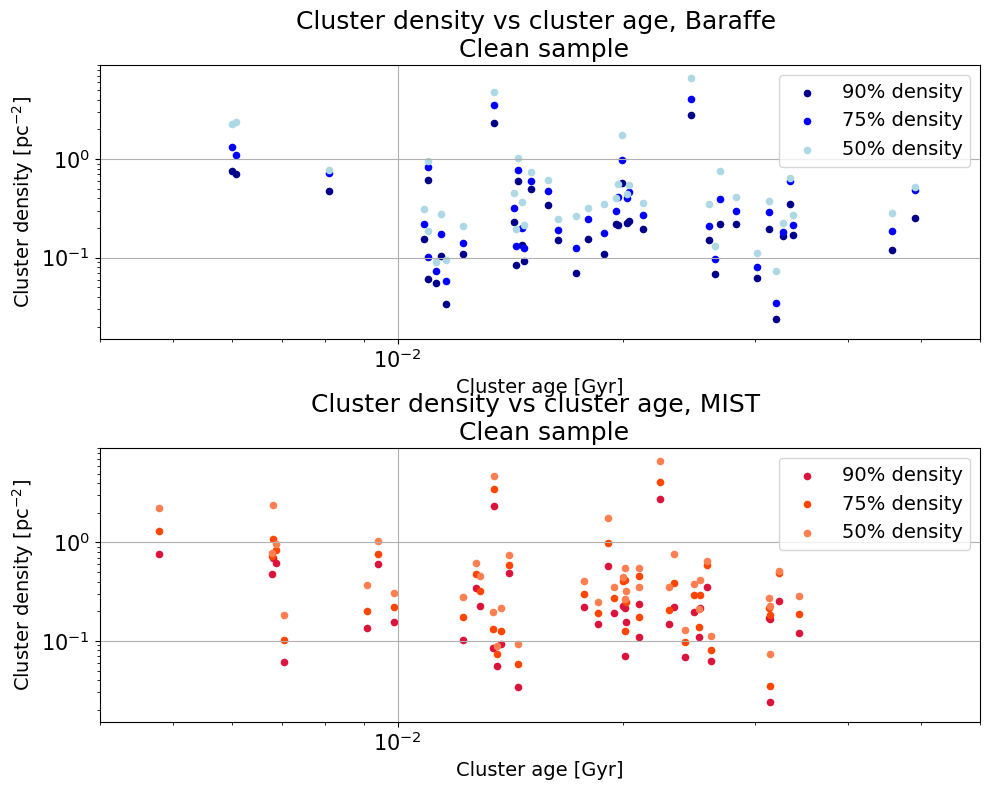

In [140]:
fig5, ax5 = plt.subplots(2, 1, figsize=(10, 8))



ax5[0].scatter(cluster_ages_Baraffe_clean, dens_90_baraffe_clean, c='darkblue', s=20, alpha=1, 
              label='90% density')
ax5[0].scatter(cluster_ages_Baraffe_clean, dens_75_baraffe_clean, c='blue', s=20, alpha=1, 
              label='75% density')
ax5[0].scatter(cluster_ages_Baraffe_clean, dens_50_baraffe_clean, c='lightblue', s=20, alpha=1, 
              label='50% density')

    


ax5[0].set_xlabel('Cluster age [Gyr]')
ax5[0].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax5[0].set_title('Cluster density vs cluster age, Baraffe \n Clean sample')

ax5[0].set_xlim(4e-3, 6e-2)
ax5[0].set_ylim(1.5e-2, 9e0)
ax5[0].set_yscale('log')
ax5[0].set_xscale('log')

ax5[0].legend()





ax5[1].scatter(cluster_ages_MIST_clean, dens_90_MIST_clean, c='crimson', s=20, alpha=1, 
              label='90% density')
ax5[1].scatter(cluster_ages_MIST_clean, dens_75_MIST_clean, c='orangered', s=20, alpha=1, 
              label='75% density')
ax5[1].scatter(cluster_ages_MIST_clean, dens_50_MIST_clean, c='coral', s=20, alpha=1, 
              label='50% density')


ax5[1].set_xlabel('Cluster age [Gyr]')
ax5[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax5[1].set_title('Cluster density vs cluster age, MIST \n Clean sample')

ax5[1].set_xlim(4e-3, 6e-2)
ax5[1].set_ylim(1.5e-2, 9e0)
ax5[1].set_yscale('log')
ax5[1].set_xscale('log')

ax5[1].legend()




plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('Plots/Cluster_density_vs_age_clean.png')
plt.show()

### Fitting power-law

In [57]:
def powerlaw(x, a, C):
    return C*x**a

def linear(x, k, m):
    return m + k*x

In [58]:
x_fit_vals_clean = np.linspace(1e-4, 6e-1, 1000)

ks_baraffe_clean = np.empty((3))
ms_baraffe_clean = np.empty((3))
param_errors_baraffe_clean = np.empty((2, 3))
y_fit_vals_baraffe_clean = np.empty((1000, 3))

ks_MIST_clean = np.empty((3))
ms_MIST_clean = np.empty((3))
param_errors_MIST_clean = np.empty((2, 3))
y_fit_vals_MIST_clean = np.empty((1000, 3))

densities_baraffe_clean = [dens_90_baraffe_clean, dens_75_baraffe_clean, dens_50_baraffe_clean] #['90_percent', '75_percent', '50_percent']
densities_MIST_clean = [dens_90_MIST_clean, dens_75_MIST_clean, dens_50_MIST_clean]

for i in range(3):
    lin_params_baraffe, lin_cov_baraffe = scopt.curve_fit(linear, xdata=np.log10(cluster_ages_Baraffe_clean), 
                                                      ydata=np.log10(densities_baraffe_clean[i]))

    ks_baraffe_clean[i], ms_baraffe_clean[i] = lin_params_baraffe
    
    
    param_errors_baraffe_clean[:, i] = np.sqrt(np.diag(lin_cov_baraffe))


    lin_params_MIST, lin_cov_MIST = scopt.curve_fit(linear, xdata=np.log10(cluster_ages_MIST_clean), 
                                                ydata=np.log10(densities_MIST_clean[i]))

    ks_MIST_clean[i], ms_MIST_clean[i] = lin_params_MIST
    
    
    param_errors_MIST_clean[:, i] = np.sqrt(np.diag(lin_cov_MIST))
    
    y_fit_vals_baraffe_clean[:, i] = powerlaw(x_fit_vals_clean, lin_params_baraffe[0], 10**lin_params_baraffe[1])

    y_fit_vals_MIST_clean[:, i] = powerlaw(x_fit_vals_clean, lin_params_MIST[0], 10**lin_params_MIST[1])


print(ks_baraffe_clean, ks_MIST_clean)
print(ms_baraffe_clean, ms_MIST_clean)
print()
print(param_errors_baraffe_clean)
print(param_errors_MIST_clean)

[-0.37393735 -0.37567709 -0.45776282] [-0.58227129 -0.59072863 -0.64068288]
[-1.3587874  -1.18549047 -1.16628884] [-1.74215659 -1.5808667  -1.50733909]

[[0.31964623 0.32299321 0.31340557]
 [0.56157663 0.56745684 0.55061261]]
[[0.30723312 0.31026913 0.30075269]
 [0.55034727 0.55578569 0.53873888]]


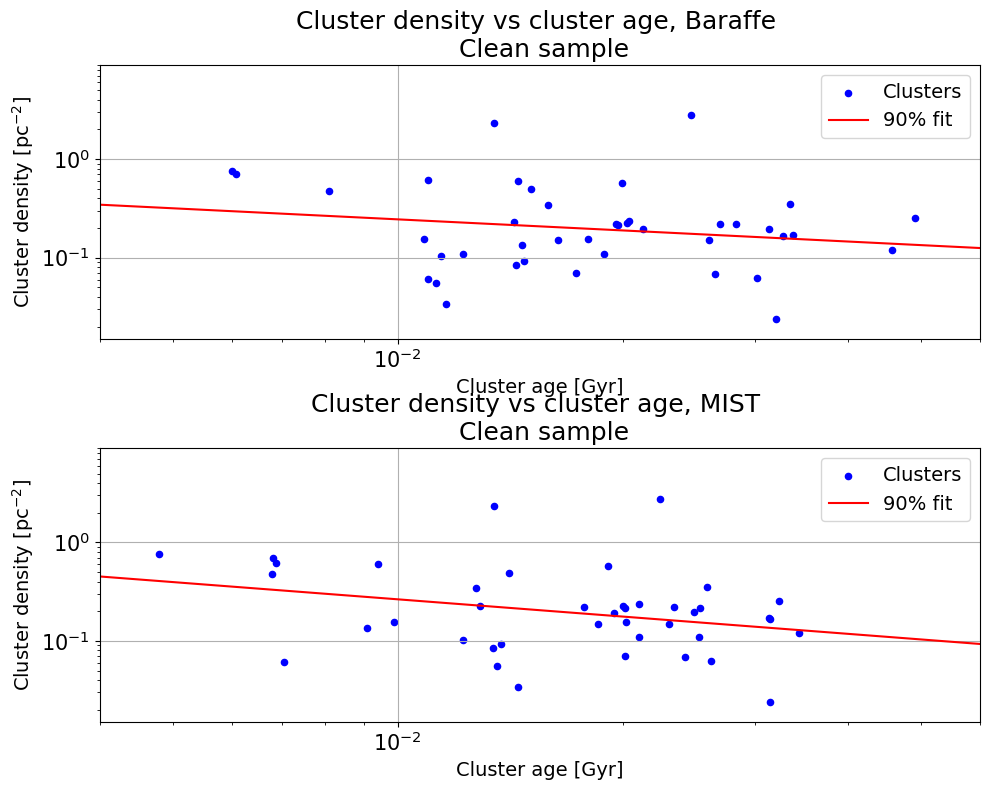

In [141]:
fig6, ax6 = plt.subplots(2, 1, figsize=(10, 8))


ax6[0].scatter(cluster_ages_Baraffe_clean, dens_90_baraffe_clean, c='blue', s=20, alpha=1, 
              label='Clusters')
#ax6[0].scatter(cluster_ages_Baraffe_clean, dens_75_baraffe_clean, c='blue', s=20, alpha=1, 
#              label='Baraffe 75%')
#ax6[0].scatter(cluster_ages_Baraffe_clean, dens_50_baraffe_clean, c='lightblue', s=20, alpha=1, 
#              label='Baraffe 50%')

ax6[0].plot(x_fit_vals_clean, y_fit_vals_baraffe_clean[:, 0], 'r', label= '90% fit', linestyle='solid')
#ax6[0].plot(x_fit_vals_clean, y_fit_vals_baraffe_clean[:, 1], 'orangered', label= '75% fit', linestyle='solid')
#ax6[0].plot(x_fit_vals_clean, y_fit_vals_baraffe_clean[:, 2], 'coral', label= '50% fit', linestyle='solid')


    


ax6[0].set_xlabel('Cluster age [Gyr]')
ax6[0].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax6[0].set_title('Cluster density vs cluster age, Baraffe \n Clean sample')

ax6[0].set_xlim(4e-3, 6e-2)
ax6[0].set_ylim(1.5e-2, 9e0)
ax6[0].set_yscale('log')
ax6[0].set_xscale('log')

ax6[0].legend()





ax6[1].scatter(cluster_ages_MIST_clean, dens_90_MIST_clean, c='blue', s=20, alpha=1, 
              label='Clusters')
#ax6[1].scatter(cluster_ages_MIST_clean, dens_75_MIST_clean, c='orangered', s=20, alpha=1, 
#              label='MIST 75%')
#ax6[1].scatter(cluster_ages_MIST_clean, dens_50_MIST_clean, c='coral', s=20, alpha=1, 
#              label='MIST 50%')

ax6[1].plot(x_fit_vals_clean, y_fit_vals_MIST_clean[:, 0], 'r', label= '90% fit', linestyle='solid')
#ax6[1].plot(x_fit_vals_clean, y_fit_vals_MIST_clean[:, 1], 'blue', label= '75% fit', linestyle='solid')
#ax6[1].plot(x_fit_vals_clean, y_fit_vals_MIST_clean[:, 2], 'lightblue', label= '50% fit', linestyle='solid')


ax6[1].set_xlabel('Cluster age [Gyr]')
ax6[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax6[1].set_title('Cluster density vs cluster age, MIST \n Clean sample')

ax6[1].set_xlim(4e-3, 6e-2)
ax6[1].set_ylim(1.5e-2, 9e0)
ax6[1].set_yscale('log')
ax6[1].set_xscale('log')

ax6[1].legend()




plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('Plots/Cluster_density_vs_age_with_fit_clean.png')
plt.show()

In [41]:
#clusters_n_stars = np.array(clusters_n_stars)


#cluster_lengths_Baraffe = clusters_n_stars[before_inds_Baraffe]
#cluster_lengths_MIST = clusters_n_stars[before_inds_MIST]

#print(cluster_lengths_Baraffe)

### Plotting slopes vs densities Baraffe

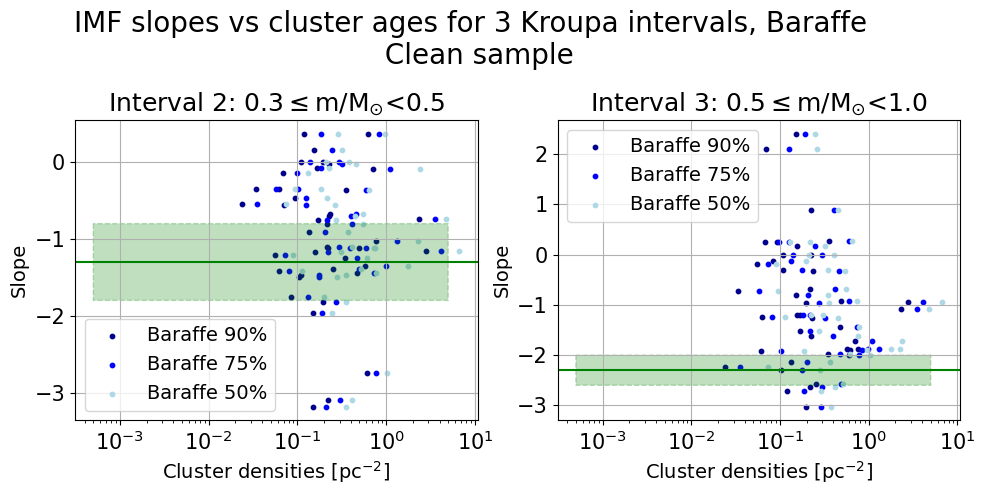

In [142]:
fig7, ax7 = plt.subplots(1, 2, figsize=(10, 5))

fig7.suptitle('IMF slopes vs cluster ages for 3 Kroupa intervals, Baraffe \n Clean sample', fontsize=20)

colours_baraffe = ['darkblue', 'blue', 'lightblue']
colours_MIST = ['crimson', 'orangered', 'coral']


ax7[0].scatter(dens_baraffe_clean['90_percent'][slope2_Baraffe_clean], interval_slopes_Baraffe_clean[1], 
               c=colours_baraffe[0], s=10, alpha=1, label='Baraffe 90%')
   
ax7[0].scatter(dens_baraffe_clean['75_percent'][slope2_Baraffe_clean], interval_slopes_Baraffe_clean[1], 
               c=colours_baraffe[1], s=10, alpha=1, label='Baraffe 75%')

ax7[0].scatter(dens_baraffe_clean['50_percent'][slope2_Baraffe_clean], interval_slopes_Baraffe_clean[1], 
               c=colours_baraffe[2], s=10, alpha=1, label='Baraffe 50%')
    
    

ax7[0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax7[0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax7[0].set_xlabel('Cluster densities [pc$^{-2}$]')
ax7[0].set_ylabel('Slope')
ax7[0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}') 
#ax7[0].set_xlim(8e-5, 9e0)
#ax7[0].set_ylim(-5, 5)

ax7[0].legend()
ax7[0].set_xscale('log')




ax7[1].scatter(dens_baraffe_clean['90_percent'][slope3_Baraffe_clean], interval_slopes_Baraffe_clean[2], 
               c=colours_baraffe[0], s=10, alpha=1, label=f'Baraffe 90%')
    
ax7[1].scatter(dens_baraffe_clean['75_percent'][slope3_Baraffe_clean], interval_slopes_Baraffe_clean[2], 
               c=colours_baraffe[1], s=10, alpha=1, label=f'Baraffe 75%')
    
ax7[1].scatter(dens_baraffe_clean['50_percent'][slope3_Baraffe_clean], interval_slopes_Baraffe_clean[2], 
               c=colours_baraffe[2], s=10, alpha=1, label=f'Baraffe 50%')
    
    
    
ax7[1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax7[1].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax7[1].set_xlabel('Cluster densities [pc$^{-2}$]')
ax7[1].set_ylabel('Slope')
ax7[1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
#ax7[1].set_xlim(3e-4, 8e0)
#ax7[1].set_ylim(-5, 5)

ax7[1].legend()
ax7[1].set_xscale('log')



plt.tight_layout()
plt.savefig('Plots/Slopes_vs_cluster_densities_baraffe_clean.png')
plt.show()

### Plotting slopes vs densities MIST

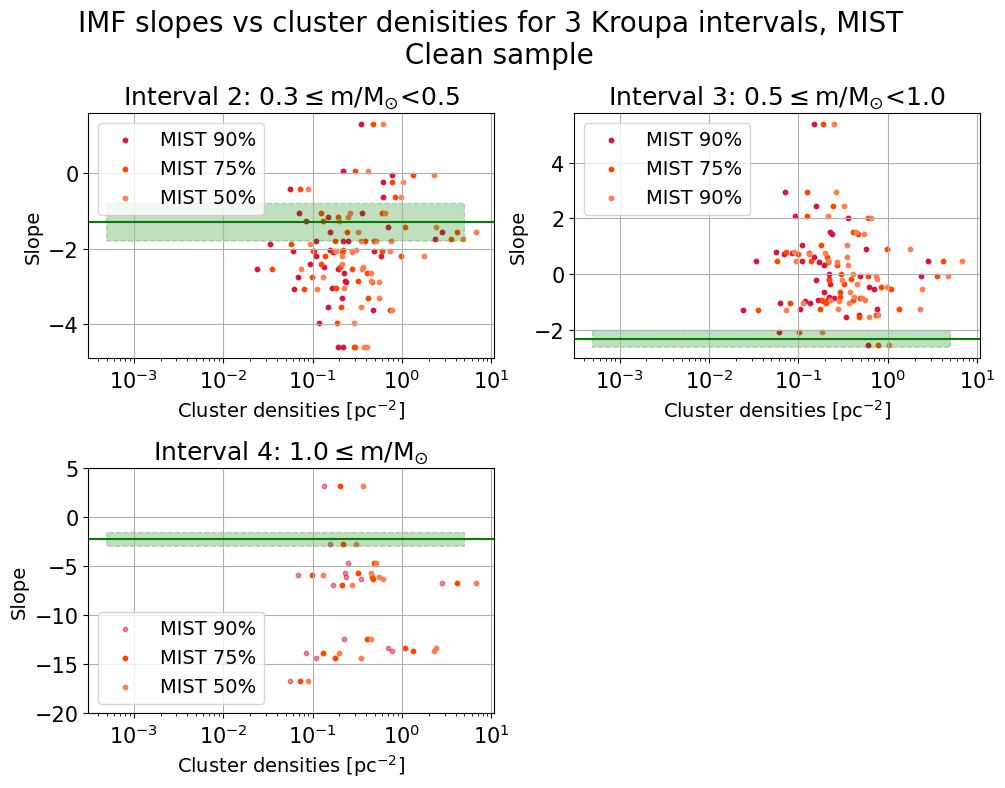

In [143]:
fig8, ax8 = plt.subplots(2, 2, figsize=(10, 8))

fig8.suptitle('IMF slopes vs cluster denisities for 3 Kroupa intervals, MIST \n Clean sample', fontsize=20)

colours_baraffe = ['darkblue', 'blue', 'lightblue']
colours_MIST = ['crimson', 'orangered', 'coral']


ax8[0, 0].scatter(dens_MIST_clean['90_percent'][slope2_MIST_clean], interval_slopes_MIST_clean[1], 
                  c=colours_MIST[0], s=10, alpha=1, label='MIST 90%')
    
    
ax8[0, 0].scatter(dens_MIST_clean['75_percent'][slope2_MIST_clean], interval_slopes_MIST_clean[1], 
                  c=colours_MIST[1], s=10, alpha=1, label='MIST 75%')

    
ax8[0, 0].scatter(dens_MIST_clean['50_percent'][slope2_MIST_clean], interval_slopes_MIST_clean[1], 
                  c=colours_MIST[2], s=10, alpha=1, label='MIST 50%')
    
    

ax8[0, 0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax8[0, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax8[0, 0].set_xlabel('Cluster densities [pc$^{-2}$]')
ax8[0, 0].set_ylabel('Slope')
ax8[0, 0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}') #interval_edges[1][0]
#ax8[0, 0].set_xlim(8e-5, 9e0)
#ax8[0, 0].set_ylim(-5, 5)

ax8[0, 0].legend()
ax8[0, 0].set_xscale('log')




ax8[0, 1].scatter(dens_MIST_clean['90_percent'][slope3_MIST_clean], interval_slopes_MIST_clean[2], 
                   c=colours_MIST[0], s=10, alpha=1, label=f'MIST 90%')
    
    
ax8[0, 1].scatter(dens_MIST_clean['75_percent'][slope3_MIST_clean], interval_slopes_MIST_clean[2], 
                  c=colours_MIST[1], s=10, alpha=1, label=f'MIST 75%')
    
    
ax8[0, 1].scatter(dens_MIST_clean['50_percent'][slope3_MIST_clean], interval_slopes_MIST_clean[2], 
                  c=colours_MIST[2], s=10, alpha=1, label=f'MIST 90%')
    
    
    
ax8[0, 1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax8[0, 1].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax8[0, 1].set_xlabel('Cluster densities [pc$^{-2}$]')
ax8[0, 1].set_ylabel('Slope')
ax8[0, 1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
#ax8[0, 1].set_xlim(3e-4, 8e0)
#ax8[0, 1].set_ylim(-5, 5)

ax8[0, 1].legend()
ax8[0, 1].set_xscale('log')






ax8[1, 0].scatter(dens_MIST_clean['90_percent'][slope4_MIST_clean], interval_slopes_MIST_clean[3], 
                  c=colours_MIST[0], s=10, alpha=0.5, label=f'MIST 90%')
    
    
ax8[1, 0].scatter(dens_MIST_clean['75_percent'][slope4_MIST_clean], interval_slopes_MIST_clean[3], 
                  c=colours_MIST[1], s=10, alpha=1, label=f'MIST 75%')
    
    
ax8[1, 0].scatter(dens_MIST_clean['50_percent'][slope4_MIST_clean], interval_slopes_MIST_clean[3], 
                  c=colours_MIST[2], s=10, alpha=1, label=f'MIST 50%')
    

ax8[1, 0].axhline(kroupa_slopes[3], linestyle='solid', color='g')
ax8[1, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[3]-kroupa_slope_errors[3],
                     kroupa_slopes[3]+kroupa_slope_errors[3], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax8[1, 0].set_xlabel('Cluster densities [pc$^{-2}$]')
ax8[1, 0].set_ylabel('Slope')
ax8[1, 0].set_title(f'Interval 4: '+f'{interval_edges[3][0]}'+r'$\leq$m/'+r'M$_{\odot}$')
ax8[1, 0].set_ylim(-20, 5)

ax8[1, 0].legend()
ax8[1, 0].set_xscale('log')


ax8[1, 1].remove()


plt.tight_layout()
plt.savefig('Plots/Slopes_vs_cluster_densities_MIST_clean.png')
plt.show()

## Larger sample

In [49]:
%%time

clusters_sep, clusters_names = cluster_list(cluster_table, 50, 'gaia', None, 5000)

# Only for bin width of 0.2 dex
#del [clusters_sep[499]] # Problems for Baraffe
#del [clusters_names[499]]

#del [clusters_sep[310]] # Problems for MIST
#del [clusters_names[310]]

#del [clusters_sep[76]] # Problems for MIST
#del [clusters_names[76]]

#del [clusters_sep[71]] # Problems for Baraffe
#del [clusters_names[71]]

del [clusters_sep[48]] 
del [clusters_names[48]]

del [clusters_sep[12]] 
del [clusters_names[12]]

print(len(clusters_sep))
print(len(clusters_names))

clusters_n_stars = [len(i) for i in clusters_sep]
clusters_names_float = np.array([float(x) for x in clusters_names])

print(clusters_sep[0].columns)

382
382
<TableColumns names=('GaiaID','Parallax','Parallax_error','M_apparent','G_bp','G_rp','Cluster_number','RA_ICRS','DE_ICRS','dist','dist_error','bp_rp','M_V')>
Wall time: 3.06 s


In [73]:
#pos_18 = np.where(clusters_names_float==18.)[0]

#pos_74 = np.where(clusters_names_float==74.)[0]

#print(pos_18, pos_74)

In [51]:
clusters_distances = np.array([cluster['dist'].value[0] for cluster in clusters_sep])
clusters_dist_errs = np.array([cluster['dist_error'].value[0] for cluster in clusters_sep])
print(len(clusters_sep))

print(type(clusters_names[0]))
print(clusters_names_float)
print(len(clusters_distances))
print(len(clusters_dist_errs))
#print(clusters_distances[396])
#print(clusters_dist_errs[396])

382
<class 'str'>
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  11.  14.  15.  19.  20.
  21.  22.  23.  25.  26.  27.  31.  32.  34.  36.  37.  38.  40.  41.
  44.  46.  47.  48.  51.  53.  54.  55.  57.  58.  60.  61.  63.  66.
  67.  69.  71.  72.  73.  75.  76.  78.  79.  80.  81.  84.  88.  89.
  90.  91.  92.  94.  95.  98.  99. 101. 102. 103. 105. 106. 108. 109.
 112. 115. 117. 118. 120. 121. 122. 123. 124. 126. 127. 128. 129. 133.
 135. 136. 137. 139. 143. 144. 145. 147. 148. 150. 152. 153. 155. 156.
 161. 162. 163. 164. 165. 166. 167. 168. 169. 171. 172. 173. 174. 176.
 177. 178. 179. 180. 181. 182. 183. 184. 186. 187. 188. 190. 193. 194.
 197. 203. 204. 206. 207. 208. 213. 218. 220. 223. 225. 228. 229. 230.
 231. 233. 235. 236. 238. 239. 242. 243. 246. 247. 250. 251. 253. 254.
 261. 263. 264. 265. 267. 269. 270. 273. 274. 278. 284. 285. 291. 292.
 293. 296. 297. 303. 304. 310. 315. 316. 320. 324. 325. 326. 328. 330.
 331. 332. 334. 335. 339. 340. 342. 343. 344. 346. 350. 352

411.3391061524547 838.3010304515518 1213.9477653658287

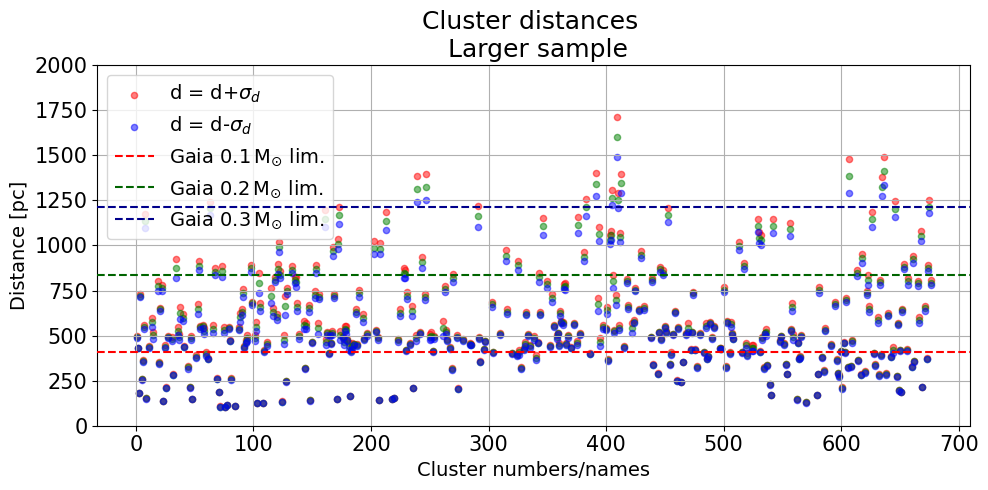

In [52]:
fig02, ax02 = plt.subplots(figsize=(10, 5))

ax02.scatter(clusters_names_float, clusters_distances+clusters_dist_errs, c='r', s=20, alpha=0.5, label=r'd = d+$\sigma_d$') #fc=(0, 0, 1, 0.25)
ax02.scatter(clusters_names_float, clusters_distances, c='g', s=20, alpha=0.5)
ax02.scatter(clusters_names_float, clusters_distances-clusters_dist_errs, c='b', s=20, alpha=0.5, label=r'd = d-$\sigma_d$')


ax02.axhline(411, color='red', linestyle='dashed', label=r'Gaia $0.1 \,$M$_{\odot}$ lim.', zorder=20)
#ax02.text(665, 130, r'$A_V=0$', fontsize=12, zorder=20)

#ax02.axhline(77.7, color='red', linestyle='dashed', zorder=20)
#ax02.text(665, 10, r'$A_V=1$', fontsize=12, zorder=20)

ax02.axhline(838, color='darkgreen', linestyle='dashed', label=r'Gaia $0.2 \,$M$_{\odot}$ lim.', zorder=20)
#ax02.text(665, 355, r'$A_V=0$', fontsize=12, zorder=20)

ax02.axhline(1214, color='darkblue', linestyle='dashed', label=r'Gaia $0.3 \,$M$_{\odot}$ lim.', zorder=20)
#ax02.text(665, 647, r'$A_V=0$', fontsize=12, zorder=20)

ax02.set_xlabel('Cluster numbers/names')
ax02.set_ylabel('Distance [pc]')
ax02.set_title('Cluster distances \n Larger sample')
ax02.set_ylim(0, 2000)


ax02.legend()


plt.tight_layout()
plt.savefig('Plots/Cluster_distances_large.png')
plt.show()

**NOTE:**

- From the plot above, I can easily see that the uncertainty increases with the distance from us, which means that the errors become more significant. 

- The lines also say that Gaia can probably not observe any stars with $0.1 \,$M$_{\odot} \leq M_{\star}$ in any of our clusters WITHOUT extinction. It can definetly not observe them with extinction as well. 

- This means that any results from the first interval $0.01 \,$M$_{\odot} \leq M_{\star} \leq 0.08 \,$M$_{\odot}$ are probably totally unreliable

## Baraffe

### Fitting isochrones and interpolating masses

In [77]:
print(clusters_names_clean)

['1', '2', '6', '11', '27', '41', '78', '92', '103', '109', '148', '171', '182', '207', '320', '334', '359', '370', '378', '386', '400', '415', '438', '440', '445', '461', '476', '480', '486', '487', '554', '584', '600', '606', '614', '628', '642', '648', '650', '660', '662']


In [78]:
%%time
cluster_log_counts_Baraffe, cluster_log_edges_Baraffe, cluster_masses_Baraffe, cluster_ages_Baraffe, same_as_1st_isochrone_Baraffe, cluster_names_Baraffe = final_IMFs(clusters_sep, clusters_names_float, 'Baraffe', '0.00', 0.2, 
                                                                                                                                                                        False, False, False, False, False) #, tmass_clusters_sep

print('Done')

i new = 0
i new = 1
i new = 2
i new = 3
i new = 4
i new = 5
i new = 6
i new = 7
i new = 8
i new = 9
i new = 10
i new = 11
i new = 12
i new = 13
i new = 14
i new = 15
i new = 16
i new = 17
i new = 18
i new = 19
i new = 20
i new = 21
i new = 22
i new = 23
i new = 24
i new = 25
i new = 26
i new = 27
i new = 28
i new = 29
i new = 30
i new = 31
i new = 32
i new = 33
i new = 34
i new = 35
i new = 36
i new = 37
i new = 38
i new = 39
i new = 40
i new = 41
i new = 42
i new = 43
i new = 44
i new = 45
i new = 46
i new = 47
i new = 48
i new = 49
i new = 50
i new = 51
i new = 52
i new = 53
i new = 54
i new = 55
i new = 56
i new = 57
i new = 58
i new = 59
i new = 60
i new = 61
i new = 62
i new = 63
i new = 64
i new = 65
i new = 66
i new = 67
i new = 68
i new = 69
i new = 70
i new = 71
i new = 72
i new = 73
i new = 74
i new = 75
i new = 76
i new = 77
i new = 78
i new = 79
i new = 80
i new = 81
i new = 82
i new = 83
i new = 84
i new = 85
i new = 86
i new = 87
i new = 88
i new = 89
i new = 90
i new = 9

In [50]:
#cluster_names_Baraffe

In [79]:
cluster_ages_Baraffe = np.array(cluster_ages_Baraffe)

print(np.shape(cluster_log_edges_Baraffe))
print(np.shape(cluster_log_counts_Baraffe))
print(np.shape(cluster_masses_Baraffe))
print(np.shape(cluster_ages_Baraffe))
print(type(cluster_ages_Baraffe))

(359,)
(359,)
(359,)
(359,)
<class 'numpy.ndarray'>


### Fitting slopes to histograms

In [80]:
%%time
cluster_bin_widths_Baraffe, all_cluster_params_Baraffe, cluster_kroupa_diff_Baraffe, single_nonzero_bin_counter_Baraffe = IMF_slopes(cluster_log_edges_Baraffe, cluster_log_counts_Baraffe, 
                                                                                                                                     cluster_masses_Baraffe, model='Baraffe', intervals='Kroupa', 
                                                                                                                                     plot=False)

print('Done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [81]:
has_slopes_Baraffe = []

slope1_Baraffe = []
slope2_Baraffe = []
slope3_Baraffe = []
slope4_Baraffe = []

for i, cluster_slopes in enumerate(all_cluster_params_Baraffe):
    #isnan_mask = np.isnan(cluster_slopes)==True
    notnan_mask = np.isnan(cluster_slopes[0, :])==False
    
    slope_numbers = np.array([1, 2, 3, 4])
    which_slopes = slope_numbers[notnan_mask]
    
    has_slopes_Baraffe.append(which_slopes)
    
    if any(which_slopes==1):
        slope1_Baraffe.append(i)
        
    if any(which_slopes==2):
        slope2_Baraffe.append(i)
        
    if any(which_slopes==3):
        slope3_Baraffe.append(i)
        
    if any(which_slopes==4):
        slope4_Baraffe.append(i)

In [62]:
#%%time
#densities_baraffe = np.empty((len(clusters_sep), 3))
#
#for i, cluster in enumerate(clusters_sep):
#    densities_i = density(clusters_sep[i]['RA_ICRS'], clusters_sep[i]['DE_ICRS'],
#                              clusters_sep[i]['dist'], clusters_names[i], False, False)
#    
#    
#    #print(type(densities_i))
#    #print(densities_i)
#    densities_baraffe[i, :] = densities_i

In [63]:
#densities_baraffe_table = Table(densities_baraffe, names=['90_percent', '75_percent', '50_percent'])

#densities_baraffe_table.write('densities_baraffe_table_more.txt', format='ascii', overwrite=True)

## MIST

In [64]:
#%%time

#clusters_sep_MIST, clusters_names_MIST = cluster_list(cluster_table, 50, 'gaia', None, 5000)

# Only for bin width of 0.2 dex
#del [clusters_sep[499]] # Problems for Baraffe
#del [clusters_names[499]]

#del [clusters_sep_MIST[310]] # Problems for MIST
#del [clusters_names_MIST[310]]

#del [clusters_sep_MIST[76]] # Problems for MIST
#del [clusters_names_MIST[76]]

#del [clusters_sep_MIST[71]] # Problems for Baraffe
#del [clusters_names_MIST[71]]

#print(len(clusters_sep_MIST))
#print(clusters_sep_MIST[0].columns)

In [65]:
#clusters_names_float_MIST = np.array([float(x) for x in clusters_names_MIST])


### Fitting isochrones and interpolating masses

In [82]:
%%time
cluster_log_counts_MIST, cluster_log_edges_MIST, cluster_masses_MIST, cluster_ages_MIST, same_as_1st_iso_MIST, cluster_names_MIST = final_IMFs(clusters_sep, clusters_names_float, 'MIST', '0.00', 0.2, 
                                                                                                                                                 False, False, False, False, False) #tmass_clusters_sep, 

print('Done')

i new = 0
i new = 1
i new = 2
i new = 3
i new = 4
i new = 5
i new = 6
i new = 7
i new = 8
i new = 9
i new = 10
i new = 11
i new = 12
i new = 13
i new = 14
i new = 15
i new = 16
i new = 17
i new = 18
i new = 19
i new = 20
i new = 21
i new = 22
i new = 23
i new = 24
i new = 25
i new = 26
i new = 27
i new = 28
i new = 29
i new = 30
i new = 31
i new = 32
i new = 33
i new = 34
i new = 35
i new = 36
i new = 37
i new = 38
i new = 39
i new = 40
i new = 41
i new = 42
i new = 43
i new = 44
i new = 45
i new = 46
i new = 47
i new = 48
i new = 49
i new = 50
i new = 51
i new = 52
i new = 53
i new = 54
i new = 55
i new = 56
i new = 57
i new = 58
i new = 59
i new = 60
i new = 61
i new = 62
i new = 63
i new = 64
i new = 65
i new = 66
i new = 67
i new = 68
i new = 69
i new = 70
i new = 71
i new = 72
i new = 73
i new = 74
i new = 75
i new = 76
i new = 77
i new = 78
i new = 79
i new = 80
i new = 81
i new = 82
i new = 83
i new = 84
i new = 85
i new = 86
i new = 87
i new = 88
i new = 89
i new = 90
i new = 9

In [83]:
print(cluster_names_MIST)

[  1.   2.   4.   6.   7.   8.  11.  14.  15.  19.  20.  21.  22.  25.
  27.  31.  34.  36.  37.  38.  40.  41.  47.  53.  54.  55.  57.  58.
  60.  61.  63.  66.  67.  69.  71.  73.  75.  76.  78.  79.  80.  84.
  88.  89.  90.  91.  92.  94.  95.  98.  99. 101. 102. 103. 105. 106.
 109. 112. 115. 117. 118. 120. 121. 122. 123. 124. 127. 129. 133. 135.
 136. 137. 139. 143. 144. 145. 147. 148. 150. 152. 153. 155. 156. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 171. 172. 173. 174. 176. 177.
 178. 179. 180. 181. 182. 183. 184. 186. 187. 188. 190. 193. 194. 197.
 203. 204. 206. 207. 208. 213. 218. 220. 223. 225. 228. 229. 230. 231.
 233. 235. 236. 238. 239. 242. 243. 246. 247. 250. 251. 253. 254. 261.
 263. 264. 265. 267. 269. 270. 273. 278. 284. 285. 291. 292. 293. 296.
 297. 303. 304. 310. 315. 316. 320. 324. 325. 328. 330. 331. 332. 334.
 335. 339. 342. 343. 344. 346. 350. 352. 354. 356. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 368. 370. 373. 375. 376. 378. 381. 383. 386.
 391. 

In [84]:
cluster_ages_MIST = np.array(cluster_ages_MIST)

print(np.shape(cluster_log_edges_MIST))
print(np.shape(cluster_log_counts_MIST))
print(np.shape(cluster_masses_MIST))
print(np.shape(cluster_ages_MIST))
print(type(cluster_ages_MIST))

(345,)
(345,)
(345,)
(345,)
<class 'numpy.ndarray'>


### Fitting slopes to histograms

In [85]:
%%time
cluster_bin_widths_MIST, all_cluster_params_MIST, cluster_kroupa_diff_MIST, single_nonzero_bin_counter_MIST = IMF_slopes(cluster_log_edges_MIST, cluster_log_counts_MIST, 
                                                                                                                                     cluster_masses_MIST, model='MIST', intervals='Kroupa', 
                                                                                                                                     plot=False)

print('Done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [86]:
has_slopes_MIST = []

slope1_MIST = []
slope2_MIST = []
slope3_MIST = []
slope4_MIST = []

for i, cluster_slopes in enumerate(all_cluster_params_MIST):
    #isnan_mask = np.isnan(cluster_slopes)==True
    notnan_mask = np.isnan(cluster_slopes[0, :])==False
    
    slope_numbers = np.array([1, 2, 3, 4])
    which_slopes = slope_numbers[notnan_mask]
    
    has_slopes_MIST.append(which_slopes)
    
    if any(which_slopes==1):
        slope1_MIST.append(i)
        
    if any(which_slopes==2):
        slope2_MIST.append(i)
        
    if any(which_slopes==3):
        slope3_MIST.append(i)
        
    if any(which_slopes==4):
        slope4_MIST.append(i)

In [87]:
print(slope4_MIST)
print(slope4_Baraffe)

[0, 1, 2, 4, 11, 21, 24, 38, 53, 54, 64, 75, 90, 93, 116, 117, 130, 134, 160, 172, 188, 192, 201, 202, 204, 205, 216, 220, 221, 224, 225, 227, 230, 236, 244, 264, 266, 269, 276, 283, 294, 298, 300, 303, 304, 305, 308, 311, 313, 315, 316, 317, 319, 321, 322, 323, 326, 328, 329, 330, 331, 333, 335, 337, 339, 342]
[328, 332, 350]


In [72]:
#%%time
#densities_MIST = np.empty((len(clusters_sep_MIST), 3))
#
#for i, cluster in enumerate(clusters_sep_MIST):
#    densities_MIST_i = density(clusters_sep_MIST[i]['RA_ICRS'], clusters_sep_MIST[i]['DE_ICRS'],
#                              clusters_sep_MIST[i]['dist'], clusters_names_MIST[i], False, False)
#    
#    
#    #print(type(densities_i))
#    #print(densities_i)
#    densities_MIST[i, :] = densities_MIST_i

In [73]:
#densities_MIST_table = Table(densities_MIST, names=['90_percent', '75_percent', '50_percent'])

#densities_MIST_table.write('densities_MIST_table_more.txt', format='ascii', overwrite=True)

In [88]:
interval_slopes_Baraffe = []
interval_star_numbers_Baraffe = []
interval_cluster_ages_Baraffe = []

interval_slopes_MIST = []
interval_star_numbers_MIST = []
interval_cluster_ages_MIST = []

for i in range(4):
    #print(i)
    slope_mask_Baraffe = np.isnan(all_cluster_params_Baraffe[:, 0, i])==False
    interval_slopes_Baraffe.append(all_cluster_params_Baraffe[:, 0, i][slope_mask_Baraffe])
    n_cluster_stars_Baraffe = np.array([len(cluster_masses_Baraffe[i]) for i in range(len(cluster_masses_Baraffe))])
    n_cluster_stars_Baraffe = n_cluster_stars_Baraffe[slope_mask_Baraffe]
    interval_star_numbers_Baraffe.append(n_cluster_stars_Baraffe)
    int_cluster_ages_Baraffe = cluster_ages_Baraffe[slope_mask_Baraffe]
    interval_cluster_ages_Baraffe.append( int_cluster_ages_Baraffe)
    
    slope_mask_MIST = np.isnan(all_cluster_params_MIST[:, 0, i])==False
    interval_slopes_MIST.append(all_cluster_params_MIST[:, 0, i][slope_mask_MIST])
    n_cluster_stars_MIST = np.array([len(cluster_masses_MIST[i]) for i in range(len(cluster_masses_MIST))])
    n_cluster_stars_MIST = n_cluster_stars_MIST[slope_mask_MIST]
    interval_star_numbers_MIST.append(n_cluster_stars_MIST)
    int_cluster_ages_MIST = cluster_ages_MIST[slope_mask_MIST]
    interval_cluster_ages_MIST.append( int_cluster_ages_MIST)


kroupa_slopes = np.array([0.3, -1.3, -2.3, -2.3])
kroupa_slope_errors = np.array([0.7, 0.5, 0.3, 0.7])



interval_edges = [(0.01, 0.08), (0.08, 0.5), (0.5, 1.0), (1.0, )]
#print(kroupa_slopes[0])

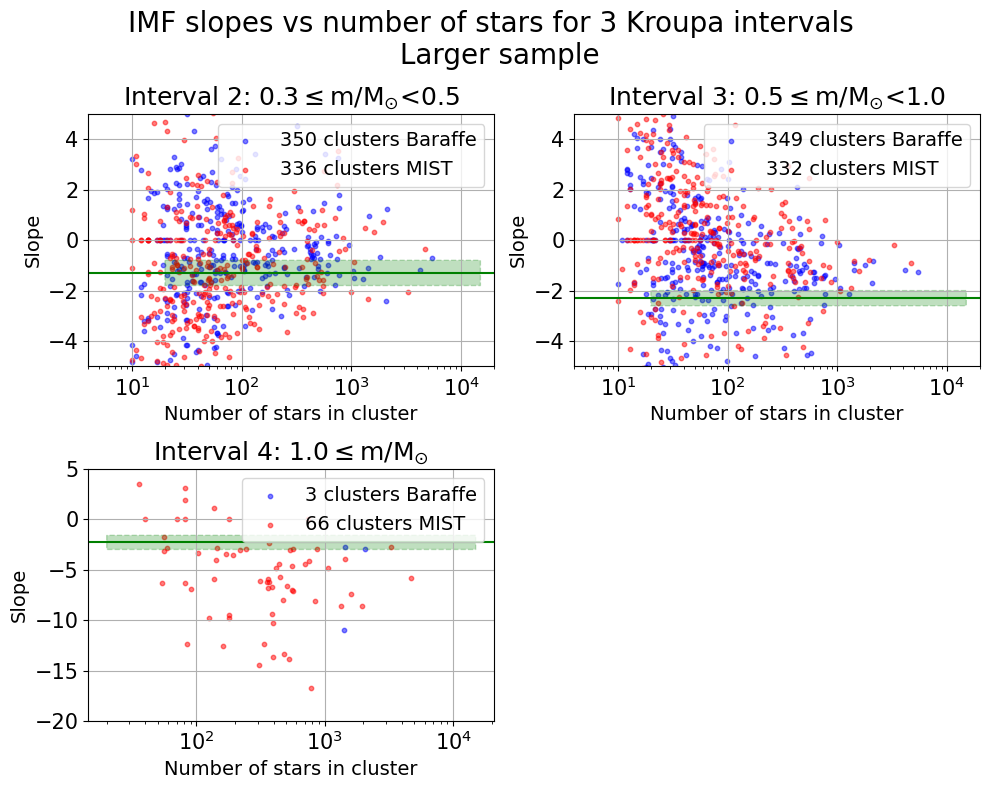

In [146]:
fig9, ax9 = plt.subplots(2, 2, figsize=(10, 8))

fig9.suptitle('IMF slopes vs number of stars for 3 Kroupa intervals \n Larger sample', fontsize=20)

colours = ['r', 'g', 'b', 'orange']



ax9[0, 0].scatter(interval_star_numbers_Baraffe[1], interval_slopes_Baraffe[1], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe[1])} clusters Baraffe')
ax9[0, 0].scatter(interval_star_numbers_MIST[1], interval_slopes_MIST[1], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST[1])} clusters MIST')
    
ax9[0, 0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax9[0, 0].fill_between(np.linspace(20, 15000, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax9[0, 0].set_xlabel('Number of stars in cluster')
ax9[0, 0].set_ylabel('Slope')
ax9[0, 0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}')
ax9[0, 0].set_xlim(4e0, 2e4)
ax9[0, 0].set_ylim(-5, 5)

ax9[0, 0].legend()
ax9[0, 0].set_xscale('log')




ax9[0, 1].scatter(interval_star_numbers_Baraffe[2], interval_slopes_Baraffe[2], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe[2])} clusters Baraffe')
ax9[0, 1].scatter(interval_star_numbers_MIST[2], interval_slopes_MIST[2], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST[2])} clusters MIST')
    
ax9[0, 1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax9[0, 1].fill_between(np.linspace(20, 15000, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax9[0, 1].set_xlabel('Number of stars in cluster')
ax9[0, 1].set_ylabel('Slope')
ax9[0, 1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
ax9[0, 1].set_xlim(4e0, 2e4)
ax9[0, 1].set_ylim(-5, 5)

ax9[0, 1].legend()
ax9[0, 1].set_xscale('log')



ax9[1, 0].scatter(interval_star_numbers_Baraffe[3], interval_slopes_Baraffe[3], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe[3])} clusters Baraffe')
ax9[1, 0].scatter(interval_star_numbers_MIST[3], interval_slopes_MIST[3], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST[3])} clusters MIST')
    
ax9[1, 0].axhline(kroupa_slopes[3], linestyle='solid', color='g')
ax9[1, 0].fill_between(np.linspace(20, 15000, 100000), kroupa_slopes[3]-kroupa_slope_errors[3],
                     kroupa_slopes[3]+kroupa_slope_errors[3], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax9[1, 0].set_xlabel('Number of stars in cluster')
ax9[1, 0].set_ylabel('Slope')
ax9[1, 0].set_title(f'Interval 4: '+f'{interval_edges[3][0]}'+r'$\leq$m/'+r'M$_{\odot}$')
ax9[1, 0].set_ylim(-20, 5)

ax9[1, 0].legend()
ax9[1, 0].set_xscale('log')


ax9[1, 1].remove()


plt.tight_layout()
plt.savefig('Plots/Slopes_vs_number_of_stars_large.png')
plt.show()

In [92]:
clusters_names_float_MIST = np.array([float(x) for x in cluster_names_MIST])
clusters_names_float_Baraffe = np.array([float(x) for x in cluster_names_Baraffe])

print(len(clusters_names_float_MIST))
print(len(cluster_ages_MIST))

print(len(clusters_names_float_Baraffe))
print(len(cluster_ages_Baraffe))

345
345
359
359


In [93]:
Baraffe_MIST_intersection, baraffe_inds, mist_inds = np.intersect1d(clusters_names_float_Baraffe, 
                                                                    clusters_names_float_MIST, 
                                                                    return_indices=True)

print(len(Baraffe_MIST_intersection))

345


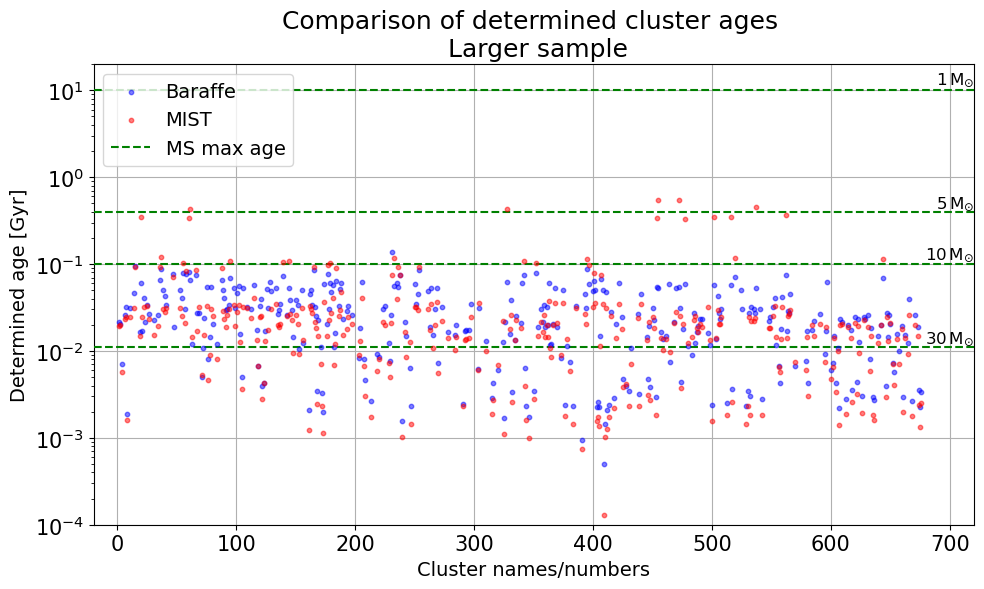

In [181]:
fig10, ax10 = plt.subplots(1, 1, figsize=(10, 6))

ax10.scatter(clusters_names_float_Baraffe, cluster_ages_Baraffe, color='b', s=10, alpha=0.5, label='Baraffe', zorder=10)
ax10.scatter(clusters_names_float_MIST, cluster_ages_MIST, color='r', s=10, alpha=0.5, label='MIST', zorder=10)



ax10.set_xlabel('Cluster names/numbers')
ax10.set_ylabel('Determined age [Gyr]')
ax10.set_title('Comparison of determined cluster ages \n Larger sample')


ax10.set_yscale('log')
ax10.set_ylim(1e-4, 2e1)
ax10.set_xlim(-20, 720)

ax10.axhline(10, color='g', linestyle='dashed', zorder=5, label='MS max age') # In Gyr
ax10.text(688, 12, r'$1 \,$M$_{\odot}$', fontsize=12)

ax10.axhline(0.4, color='g', linestyle='dashed', zorder=5)
ax10.text(688, 0.45, r'$5 \,$M$_{\odot}$', fontsize=12)

ax10.axhline(0.1, color='g', linestyle='dashed', zorder=5)
ax10.text(679.25, 0.115, r'$10 \,$M$_{\odot}$', fontsize=12)

ax10.axhline(11e-3, color='g', linestyle='dashed', zorder=5)
ax10.text(679.25, 0.0125, r'$30 \,$M$_{\odot}$', fontsize=12)

ax10.legend(loc='upper left')




#ax10[1].scatter(cluster_ages_Baraffe[baraffe_inds], cluster_ages_Baraffe[baraffe_inds], color='b', s=10, alpha=0.5, label='Baraffe')
#ax10[1].scatter(cluster_ages_Baraffe[baraffe_inds], cluster_ages_MIST, color='r', s=10, alpha=0.5, label='MIST')

#ax10[1].set_xlabel('Cluster ages Baraffe')
#ax10[1].set_ylabel('Determined age [Gyr]')
#ax10[1].set_title('Comparison of determined cluster ages \n Larger sample')

#ax10[1].legend()
#ax10[1].set_yscale('log')
#ax10[1].set_ylim(9e-5, 8e-1)
#ax10[1].set_xlim(-0.003, 0.15)


plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('Plots/Determined_ages_large.png')
plt.show()

**NOTE:**

- The absolute majority of the clusters are younger tha any of the plotted age limits, which means that the sample is probably fairly complete with high-mass stars below $10 \,$M$_{\odot}$

- It is slightly less complete if the ages from the MIST isochrones are more accurate

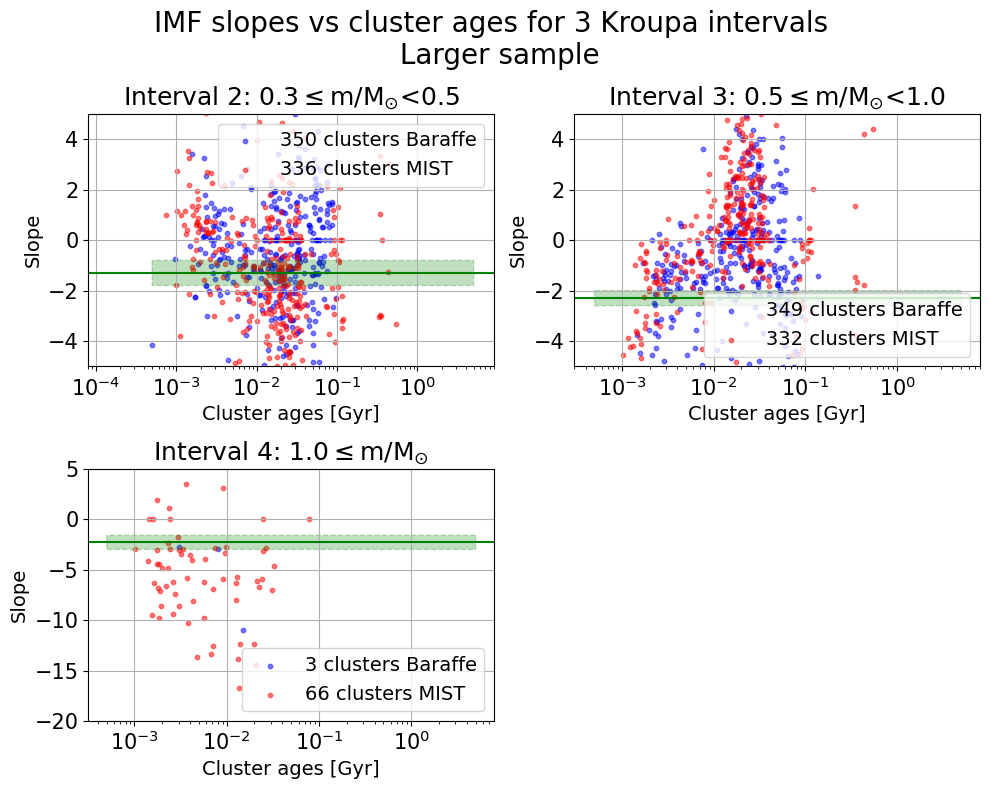

In [148]:
fig11, ax11 = plt.subplots(2, 2, figsize=(10, 8))

fig11.suptitle('IMF slopes vs cluster ages for 3 Kroupa intervals \n Larger sample', fontsize=20)

colours = ['r', 'g', 'b', 'orange']

ax11[0, 0].scatter(interval_cluster_ages_Baraffe[1], interval_slopes_Baraffe[1], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe[1])} clusters Baraffe')
ax11[0, 0].scatter(interval_cluster_ages_MIST[1], interval_slopes_MIST[1], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST[1])} clusters MIST')
    
ax11[0, 0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax11[0, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax11[0, 0].set_xlabel('Cluster ages [Gyr]')
ax11[0, 0].set_ylabel('Slope')
ax11[0, 0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}') #interval_edges[1][0]
ax11[0, 0].set_xlim(8e-5, 9e0)
ax11[0, 0].set_ylim(-5, 5)

ax11[0, 0].legend()
ax11[0, 0].set_xscale('log')




ax11[0, 1].scatter(interval_cluster_ages_Baraffe[2], interval_slopes_Baraffe[2], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe[2])} clusters Baraffe')
ax11[0, 1].scatter(interval_cluster_ages_MIST[2], interval_slopes_MIST[2], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST[2])} clusters MIST')
    
ax11[0, 1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax11[0, 1].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax11[0, 1].set_xlabel('Cluster ages [Gyr]')
ax11[0, 1].set_ylabel('Slope')
ax11[0, 1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
ax11[0, 1].set_xlim(3e-4, 8e0)
ax11[0, 1].set_ylim(-5, 5)

ax11[0, 1].legend()
ax11[0, 1].set_xscale('log')




ax11[1, 0].scatter(interval_cluster_ages_Baraffe[3], interval_slopes_Baraffe[3], c='b', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_Baraffe[3])} clusters Baraffe')
ax11[1, 0].scatter(interval_cluster_ages_MIST[3], interval_slopes_MIST[3], c='r', 
                  s=10, alpha=0.5, label=f'{len(interval_slopes_MIST[3])} clusters MIST')
    
ax11[1, 0].axhline(kroupa_slopes[3], linestyle='solid', color='g')
ax11[1, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[3]-kroupa_slope_errors[3],
                     kroupa_slopes[3]+kroupa_slope_errors[3], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax11[1, 0].set_xlabel('Cluster ages [Gyr]')
ax11[1, 0].set_ylabel('Slope')
ax11[1, 0].set_title(f'Interval 4: '+f'{interval_edges[3][0]}'+r'$\leq$m/'+r'M$_{\odot}$')
ax11[1, 0].set_ylim(-20, 5)

ax11[1, 0].legend()
ax11[1, 0].set_xscale('log')


ax11[1, 1].remove()


plt.tight_layout()
plt.savefig('Plots/Slopes_vs_cluster_ages_large.png')
plt.show()

### Density calculations

In [97]:
clusters_names_float = np.array([float(name) for name in clusters_names])
cluster_names_Baraffe_float = np.array([float(name) for name in cluster_names_Baraffe])

clusters_names_MIST_float = np.array([float(name) for name in clusters_names])
cluster_names_MIST_float = np.array([float(name) for name in cluster_names_MIST])

In [98]:
names_intersection_Baraffe, before_inds_Baraffe, after_inds_Baraffe = np.intersect1d(clusters_names_float, cluster_names_Baraffe_float, return_indices=True)

print(len(names_intersection_Baraffe))

names_intersection_MIST, before_inds_MIST, after_inds_MIST = np.intersect1d(clusters_names_MIST_float, cluster_names_MIST_float, return_indices=True)

print(len(names_intersection_MIST))

#print(clusters_names_float)
#print(cluster_names_Baraffe_float)
#print()
#print(before_inds_Baraffe)
#print(after_inds_Baraffe)
#print()
#print(before_inds_MIST)
#print(after_inds_MIST)

359
345


In [99]:
baraffe_densities_table = Table.read('densities_baraffe_table_more.txt', delimiter=' ', format='ascii')
MIST_densities_table = Table.read('densities_MIST_table_more.txt', delimiter=' ', format='ascii')

#print(baraffe_densities_table)
#print(MIST_densities_table)

In [100]:
before_inds_Baraffe = before_inds_Baraffe[before_inds_Baraffe.argsort()]
before_inds_MIST = before_inds_MIST[before_inds_MIST.argsort()]
#print(before_inds_Baraffe)
#print(before_inds_MIST)

In [101]:
dens_baraffe = baraffe_densities_table.copy()
dens_MIST = MIST_densities_table.copy()

dens_90_baraffe = dens_baraffe['90_percent'][before_inds_Baraffe]
dens_75_baraffe = dens_baraffe['75_percent'][before_inds_Baraffe]
dens_50_baraffe = dens_baraffe['50_percent'][before_inds_Baraffe]


dens_90_MIST = dens_MIST['90_percent'][before_inds_MIST]
dens_75_MIST = dens_MIST['75_percent'][before_inds_MIST]
dens_50_MIST = dens_MIST['50_percent'][before_inds_MIST]



max_age_baraffe = np.max(cluster_ages_Baraffe)
min_age_baraffe = np.min(cluster_ages_Baraffe)

max_age_MIST = np.max(cluster_ages_MIST)
min_age_MIST = np.min(cluster_ages_MIST)

print(len(dens_90_baraffe))

359


In [102]:
bin_width = 0.1


nbins_baraffe = int(np.round(2*(np.log10(max_age_baraffe) - np.log10(min_age_baraffe))/bin_width))
nbins_MIST = int(np.round(2*(np.log10(max_age_MIST) - np.log10(min_age_MIST))/bin_width))


bin_edges_baraffe = np.logspace(np.log10(min_age_baraffe), np.log10(max_age_baraffe), 2*(nbins_baraffe+1))
bin_edges_MIST = np.logspace(np.log10(min_age_MIST), np.log10(max_age_MIST), 2*(nbins_MIST+1))


edges_even_baraffe = bin_edges_baraffe[1::2]
edges_odd_baraffe = bin_edges_baraffe[0::2]
edges_even_MIST = bin_edges_MIST[1::2]
edges_odd_MIST = bin_edges_MIST[0::2]

bin_mid_odd_baraffe = edges_even_baraffe[:-1]
bin_mid_even_baraffe = edges_odd_baraffe[1:]

bin_mid_odd_MIST = edges_even_MIST[:-1]
bin_mid_even_MIST = edges_odd_MIST[1:]

print(len(bin_mid_odd_baraffe))
print(len(bin_mid_even_baraffe))

print(len(bin_mid_odd_MIST))
print(len(bin_mid_even_MIST))

49
49
72
72


In [103]:
average_90_density_baraffe = []
average_75_density_baraffe = []
average_50_density_baraffe = []
all_bin_mids_baraffe = []

for i in range(len(bin_mid_odd_baraffe)):
    all_bin_mids_baraffe.append(bin_mid_odd_baraffe[i])
    all_bin_mids_baraffe.append(bin_mid_even_baraffe[i])
    
    odd_age_mask_baraffe = (edges_odd_baraffe[i]<=cluster_ages_Baraffe)&(cluster_ages_Baraffe<edges_odd_baraffe[i+1])
    even_age_mask_baraffe = (edges_even_baraffe[i]<=cluster_ages_Baraffe)&(cluster_ages_Baraffe<edges_even_baraffe[i+1])
    
    densities_90_odd_baraffe = dens_90_baraffe[odd_age_mask_baraffe]
    average_odd_90_density_baraffe = np.mean(densities_90_odd_baraffe)
    average_90_density_baraffe.append(average_odd_90_density_baraffe)
    
    densities_90_even_baraffe = dens_90_baraffe[even_age_mask_baraffe]
    average_even_90_density_baraffe = np.mean(densities_90_even_baraffe)
    average_90_density_baraffe.append(average_even_90_density_baraffe)
    
    
    densities_75_odd_baraffe = dens_75_baraffe[odd_age_mask_baraffe]
    average_odd_75_density_baraffe = np.mean(densities_75_odd_baraffe)
    average_75_density_baraffe.append(average_odd_75_density_baraffe)
    
    densities_75_even_baraffe = dens_75_baraffe[even_age_mask_baraffe]
    average_even_75_density_baraffe = np.mean(densities_75_even_baraffe)
    average_75_density_baraffe.append(average_even_75_density_baraffe)
    
    
    densities_50_odd_baraffe = dens_50_baraffe[odd_age_mask_baraffe]
    average_odd_50_density_baraffe = np.mean(densities_50_odd_baraffe)
    average_50_density_baraffe.append(average_odd_50_density_baraffe)
    
    densities_50_even_baraffe = dens_50_baraffe[even_age_mask_baraffe]
    average_even_50_density_baraffe = np.mean(densities_50_even_baraffe)
    average_50_density_baraffe.append(average_even_50_density_baraffe)

In [104]:
average_90_density_MIST = []
average_75_density_MIST = []
average_50_density_MIST = []
all_bin_mids_MIST = []

for i in range(len(bin_mid_odd_MIST)):
    all_bin_mids_MIST.append(bin_mid_odd_MIST[i])
    all_bin_mids_MIST.append(bin_mid_even_MIST[i])
    
    odd_age_mask = (edges_odd_MIST[i]<=cluster_ages_MIST)&(cluster_ages_MIST<edges_odd_MIST[i+1])
    even_age_mask = (edges_even_MIST[i]<=cluster_ages_MIST)&(cluster_ages_MIST<edges_even_MIST[i+1])
    
    densities_90_odd = dens_90_MIST[odd_age_mask]
    average_odd_90_density = np.mean(densities_90_odd)
    densities_75_odd = dens_75_MIST[odd_age_mask]
    average_odd_75_density = np.mean(densities_75_odd)
    densities_50_odd = dens_50_MIST[odd_age_mask]
    average_odd_50_density = np.mean(densities_50_odd)
    
    densities_90_even = dens_90_MIST[even_age_mask]
    average_even_90_density = np.mean(densities_90_even)
    densities_75_even = dens_75_MIST[even_age_mask]
    average_even_75_density = np.mean(densities_75_even)
    densities_50_even = dens_50_MIST[even_age_mask]
    average_even_50_density = np.mean(densities_50_even)
    
    average_90_density_MIST.append(average_odd_90_density)
    average_90_density_MIST.append(average_even_90_density)
    
    average_75_density_MIST.append(average_odd_75_density)
    average_75_density_MIST.append(average_even_75_density)
    
    average_50_density_MIST.append(average_odd_50_density)
    average_50_density_MIST.append(average_even_50_density)

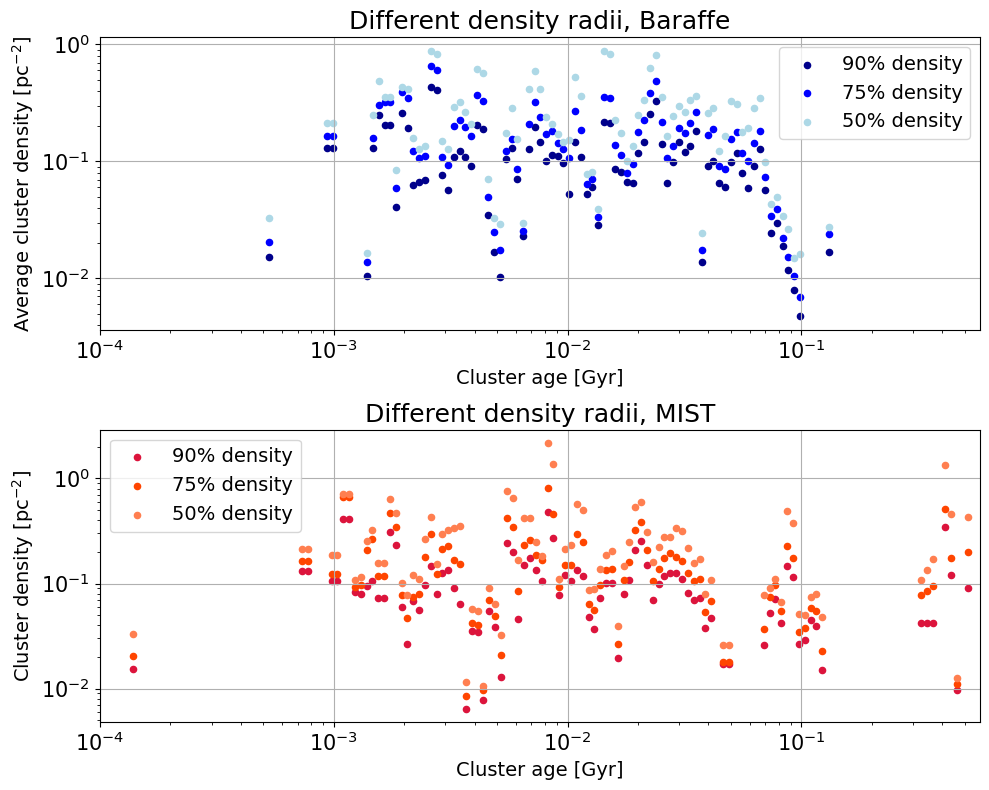

In [150]:
fig12, ax12 = plt.subplots(2, 1, figsize=(10, 8))


#for i, cl_dens in enumerate(densities_baraffe):
ax12[0].scatter(all_bin_mids_baraffe, average_90_density_baraffe, c='darkblue', s=20, alpha=1, 
              label='90% density')
ax12[0].scatter(all_bin_mids_baraffe, average_75_density_baraffe, c='blue', s=20, alpha=1, 
              label='75% density')
ax12[0].scatter(all_bin_mids_baraffe, average_50_density_baraffe, c='lightblue', s=20, alpha=1, 
              label='50% density')

    


ax12[0].set_xlabel('Cluster age [Gyr]')
ax12[0].set_ylabel(r'Average cluster density [pc$^{-2}$]')
ax12[0].set_title(fr'Different density radii, Baraffe')

ax12[0].set_xlim(0.0001, 0.58)
ax12[0].set_yscale('log')
ax12[0].set_xscale('log')

ax12[0].legend() 





ax12[1].scatter(all_bin_mids_MIST, average_90_density_MIST, c='crimson', s=20, alpha=1, 
              label='90% density')
ax12[1].scatter(all_bin_mids_MIST, average_75_density_MIST, c='orangered', s=20, alpha=1, 
              label='75% density')
ax12[1].scatter(all_bin_mids_MIST, average_50_density_MIST, c='coral', s=20, alpha=1, 
              label='50% density')


ax12[1].set_xlabel('Cluster age [Gyr]')
ax12[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax12[1].set_title(fr'Different density radii, MIST')

ax12[1].set_xlim(0.0001, 0.58)
ax12[1].set_yscale('log')
ax12[1].set_xscale('log')

ax12[1].legend() 




plt.tight_layout()
#plt.savefig('Plots/Cluster_density_vs_age_hand_hist_large.png')
plt.show()

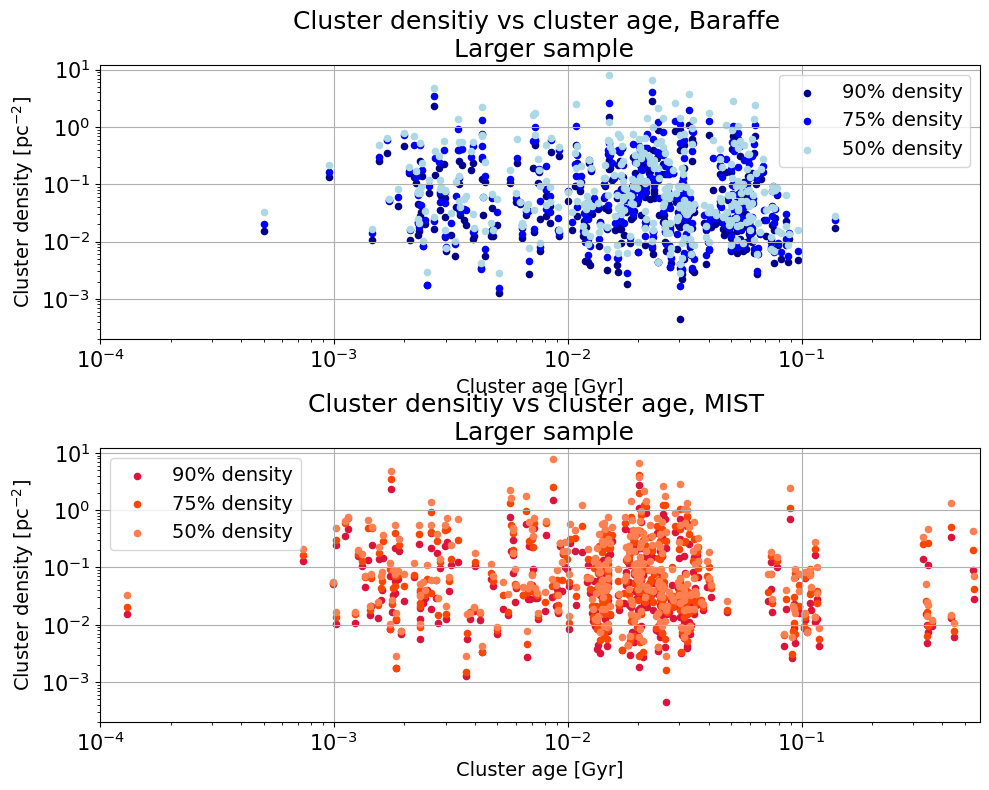

In [151]:
fig13, ax13 = plt.subplots(2, 1, figsize=(10, 8))


ax13[0].scatter(cluster_ages_Baraffe, dens_90_baraffe, c='darkblue', s=20, alpha=1, 
              label='90% density')
ax13[0].scatter(cluster_ages_Baraffe, dens_75_baraffe, c='blue', s=20, alpha=1, 
              label='75% density')
ax13[0].scatter(cluster_ages_Baraffe, dens_50_baraffe, c='lightblue', s=20, alpha=1, 
              label='50% density')

    


ax13[0].set_xlabel('Cluster age [Gyr]')
ax13[0].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax13[0].set_title('Cluster densitiy vs cluster age, Baraffe \n Larger sample')

ax13[0].set_xlim(0.0001, 0.58)
ax13[0].set_ylim(2e-4, 12)
ax13[0].set_yscale('log')
ax13[0].set_xscale('log')

ax13[0].legend()





ax13[1].scatter(cluster_ages_MIST, dens_90_MIST, c='crimson', s=20, alpha=1, 
              label='90% density')
ax13[1].scatter(cluster_ages_MIST, dens_75_MIST, c='orangered', s=20, alpha=1, 
              label='75% density')
ax13[1].scatter(cluster_ages_MIST, dens_50_MIST, c='coral', s=20, alpha=1, 
              label='50% density')


ax13[1].set_xlabel('Cluster age [Gyr]')
ax13[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax13[1].set_title('Cluster densitiy vs cluster age, MIST \n Larger sample')


ax13[1].set_xlim(0.0001, 0.58)
ax13[1].set_ylim(2e-4, 12)
ax13[1].set_yscale('log')
ax13[1].set_xscale('log')

ax13[1].legend()




plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('Plots/Cluster_density_vs_age_large.png')
plt.show()

### Fitting power-law

In [111]:
def powerlaw(x, a, C):
    return C*x**a

def linear(x, k, m):
    return m + k*x

In [112]:
age_mask_Baraffe = cluster_ages_Baraffe>5e-3
age_mask_MIST = cluster_ages_MIST>5e-3

In [154]:
x_fit_vals = np.linspace(1e-4, 6e-1, 1000)

ks_baraffe = np.empty((3))
ms_baraffe = np.empty((3))
param_errors_baraffe = np.empty((2, 3))
y_fit_vals_baraffe = np.empty((1000, 3))

ks_MIST = np.empty((3))
ms_MIST = np.empty((3))
param_errors_MIST = np.empty((2, 3))
y_fit_vals_MIST = np.empty((1000, 3))

densities_baraffe = [dens_90_baraffe, dens_75_baraffe, dens_50_baraffe] #['90_percent', '75_percent', '50_percent']
densities_MIST = [dens_90_MIST, dens_75_MIST, dens_50_MIST]

for i in range(3):
    lin_params_baraffe, lin_cov_baraffe = scopt.curve_fit(linear, xdata=np.log10(cluster_ages_Baraffe[age_mask_Baraffe]), 
                                                      ydata=np.log10(densities_baraffe[i][age_mask_Baraffe]))

    ks_baraffe[i], ms_baraffe[i] = lin_params_baraffe
    
    
    param_errors_baraffe[:, i] = np.sqrt(np.diag(lin_cov_baraffe))


    lin_params_MIST, lin_cov_MIST = scopt.curve_fit(linear, xdata=np.log10(cluster_ages_MIST[age_mask_MIST]), 
                                                ydata=np.log10(densities_MIST[i][age_mask_MIST]))

    ks_MIST[i], ms_MIST[i] = lin_params_MIST
    
    
    param_errors_MIST[:, i] = np.sqrt(np.diag(lin_cov_MIST))
    
    y_fit_vals_baraffe[:, i] = powerlaw(x_fit_vals, lin_params_baraffe[0], 10**lin_params_baraffe[1])

    y_fit_vals_MIST[:, i] = powerlaw(x_fit_vals, lin_params_MIST[0], 10**lin_params_MIST[1])


print(ks_baraffe, ks_MIST)
print(ms_baraffe, ms_MIST)
print()
print(param_errors_baraffe)
print(param_errors_MIST)

[-0.30468072 -0.30861996 -0.29544397] [-0.29161197 -0.29358917 -0.26680098]
[-1.90163173 -1.75496952 -1.57345558] [-1.87947297 -1.73140745 -1.52927805]

[[0.12331404 0.12701487 0.13137746]
 [0.19778011 0.20371578 0.21071282]]
[[0.09476031 0.09718624 0.10114478]
 [0.15691618 0.16093335 0.1674884 ]]


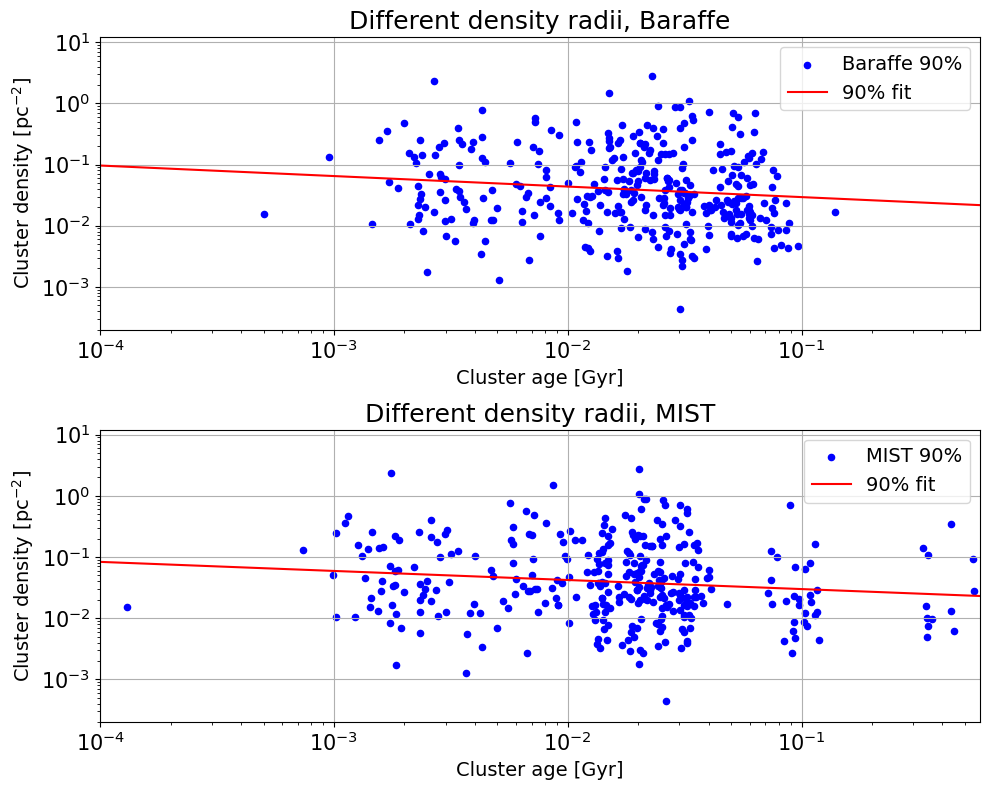

In [152]:
fig14, ax14 = plt.subplots(2, 1, figsize=(10, 8))


ax14[0].scatter(cluster_ages_Baraffe, dens_90_baraffe, c='blue', s=20, alpha=1, 
              label='Baraffe 90%')
#ax14[0].scatter(cluster_ages_Baraffe, dens_75_baraffe, c='blue', s=20, alpha=1, 
#              label='Baraffe 75%')
#ax14[0].scatter(cluster_ages_Baraffe, dens_50_baraffe, c='lightblue', s=20, alpha=1, 
#              label='Baraffe 50%')

ax14[0].plot(x_fit_vals, y_fit_vals_baraffe[:, 0], 'r', label= '90% fit', linestyle='solid')
#ax14[0].plot(x_fit_vals, y_fit_vals_baraffe[:, 1], 'orangered', label= '75% fit', linestyle='solid')
#ax14[0].plot(x_fit_vals, y_fit_vals_baraffe[:, 2], 'coral', label= '50% fit', linestyle='solid')
#ax14[0].plot(x_fit_vals, y_powerlaw_fit_vals_baraffe, 'orangered', label= 'Powerlaw fit', linestyle='dashed')

    


ax14[0].set_xlabel('Cluster age [Gyr]')
ax14[0].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax14[0].set_title(fr'Different density radii, Baraffe')

ax14[0].set_xlim(0.0001, 0.58)
ax14[0].set_ylim(2e-4, 12)
ax14[0].set_yscale('log')
ax14[0].set_xscale('log')

ax14[0].legend() 





ax14[1].scatter(cluster_ages_MIST, dens_90_MIST, c='blue', s=20, alpha=1, 
              label='MIST 90%')
#ax14[1].scatter(cluster_ages_MIST, dens_75_MIST, c='orangered', s=20, alpha=1, 
#              label='MIST 75%')
#ax14[1].scatter(cluster_ages_MIST, dens_50_MIST, c='coral', s=20, alpha=1, 
#              label='MIST 50%')

ax14[1].plot(x_fit_vals, y_fit_vals_MIST[:, 0], 'r', label= '90% fit', linestyle='solid')
#ax14[1].plot(x_fit_vals, y_fit_vals_MIST[:, 1], 'blue', label= '75% fit', linestyle='solid')
#ax14[1].plot(x_fit_vals, y_fit_vals_MIST[:, 2], 'lightblue', label= '50% fit', linestyle='solid')
#ax14[1].plot(x_fit_vals, y_powerlaw_fit_vals_MIST, 'blue', label= 'Powerlaw fit', linestyle='dashed')


ax14[1].set_xlabel('Cluster age [Gyr]')
ax14[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax14[1].set_title(fr'Different density radii, MIST')

ax14[1].set_xlim(0.0001, 0.58)
ax14[1].set_ylim(2e-4, 12)
ax14[1].set_yscale('log')
ax14[1].set_xscale('log')

ax14[1].legend() 




plt.tight_layout()
plt.savefig('Plots/Cluster_density_vs_age_with_fit_large.png')
plt.show()

In [127]:
clusters_n_stars = np.array(clusters_n_stars)


cluster_lengths_Baraffe = clusters_n_stars[before_inds_Baraffe]
cluster_lengths_MIST = clusters_n_stars[before_inds_MIST]

print(cluster_lengths_Baraffe)


[ 2275  2290  1041   534   265    60   875    68    78    79   233   544
   162   248    50  1787   153    83    65    83    57    93  3655   172
   315   101    78    63    67    62    96   198    73    52    56   436
   156    51    67    59   191   651    52   386   235   414    54    67
    52   868   285    54   122    71    88    63   548   110    54  1061
   147    50    57   238   132    95   131  1465   474    56    54    59
    88   286   116    98   166   127    57   124   245    78  1189   193
   113    97    60    63   665   116    98    92   173    72    79   346
    53   712   515   260    69    68    57    69    72    71    77   846
    56    56   165    82   317    56    56   166   120    95    61   121
  2398  2357   656   208   107    56    67    58    95   153   155   109
    87    74    98   635   124    77   110   804    85   123   313    63
    61   171    93    70    56    68    71    92   208    64    98    66
    64    68   112   113   130   102   155   110   

In [116]:
dens_mask = dens_90_baraffe[age_mask_Baraffe]<1e-2

dens_90_low = dens_90_baraffe[age_mask_Baraffe][dens_mask]

print(len(dens_90_low))
#print(dens_90_low)


cluster_lengths_baraffe_age = cluster_lengths_Baraffe[age_mask_Baraffe]

low_pos = np.where(cluster_lengths_baraffe_age==78)[0]
print(low_pos)
cluster_lengths_baraffe_low = cluster_lengths_baraffe_age[dens_mask]

print(cluster_lengths_baraffe_low)

54
[ 7 25 77]
[  78  233  248   65   83 3655   78   63   67   62   96   73   56  436
  414   52  868  285   71   63  110  238  132   95   59  116  166  127
  193   60   63  173   53  166  120   61   95  128   87  120  967 2900
  656  152  135  476  224  361   51   56   52  129  296  101]


In [117]:
special_age = cluster_ages_Baraffe[age_mask_Baraffe][7]
special_dens = dens_90_baraffe[age_mask_Baraffe][7]

dens_line = powerlaw(special_age, lin_params_baraffe[0], 10**lin_params_baraffe[1])

print(dens_line)
print(special_dens)

A_90_cluster = 50/special_dens

dN_line = (dens_line-special_dens)*A_90_cluster
print(dN_line)

0.05334132510398066
0.0047365939096781174
513.0768239914993


## Plotting together

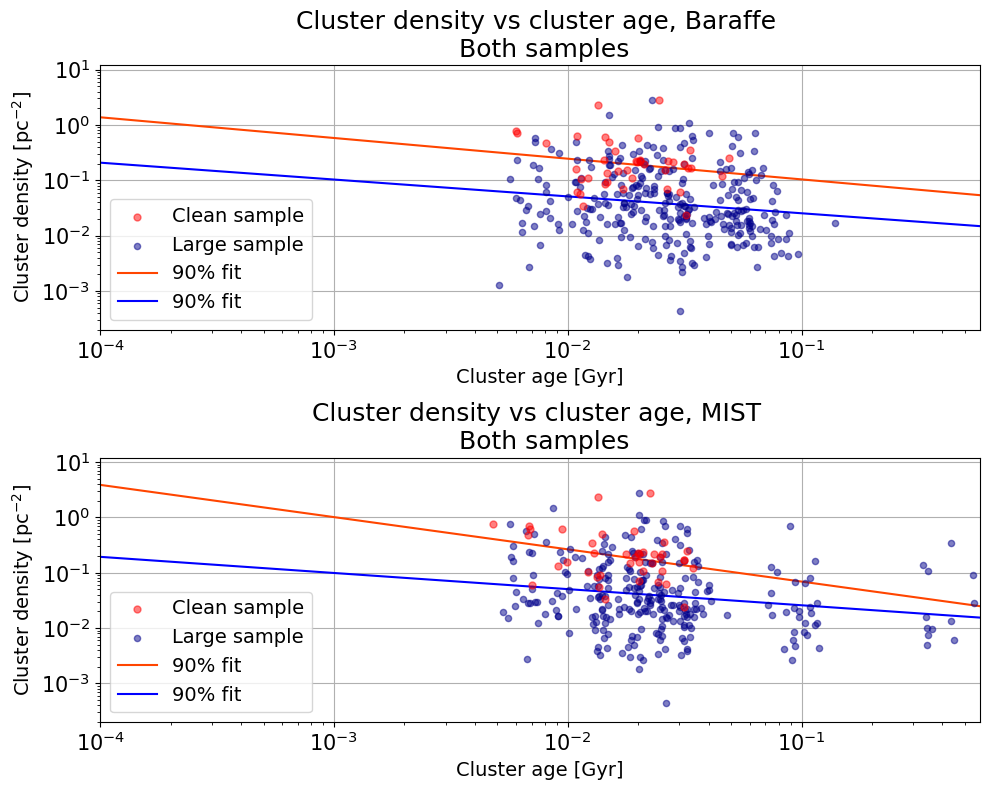

In [157]:
fig15, ax15 = plt.subplots(2, 1, figsize=(10, 8))


ax15[0].scatter(cluster_ages_Baraffe_clean, dens_90_baraffe_clean, c='red', s=25, alpha=0.5, 
              label='Clean sample', zorder=20)
ax15[0].scatter(cluster_ages_Baraffe[age_mask_Baraffe], dens_90_baraffe[age_mask_Baraffe], c='darkblue', s=20, alpha=0.5, 
              label='Large sample', zorder=10)

#ax15[0].scatter(cluster_ages_Baraffe[age_mask_Baraffe][26], dens_90_baraffe[age_mask_Baraffe][26], c='orange', s=25, alpha=0.5, 
#              label='Special', zorder=10)


ax15[0].plot(x_fit_vals_clean, y_fit_vals_baraffe_clean[:, 0], 'orangered', label= '90% fit', linestyle='solid')
ax15[0].plot(x_fit_vals, y_fit_vals_baraffe[:, 0], 'b', label= '90% fit', linestyle='solid')

    


ax15[0].set_xlabel('Cluster age [Gyr]')
ax15[0].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax15[0].set_title('Cluster density vs cluster age, Baraffe \n Both samples')

ax15[0].set_xlim(0.0001, 0.58)
ax15[0].set_ylim(2e-4, 12)
ax15[0].set_yscale('log')
ax15[0].set_xscale('log')

ax15[0].legend() 




ax15[1].scatter(cluster_ages_MIST_clean, dens_90_MIST_clean, c='r', s=25, alpha=0.5, 
              label='Clean sample', zorder=20)
ax15[1].scatter(cluster_ages_MIST[age_mask_MIST], dens_90_MIST[age_mask_MIST], c='darkblue', s=20, alpha=0.5, 
              label='Large sample', zorder=10)

ax15[1].plot(x_fit_vals_clean, y_fit_vals_MIST_clean[:, 0], 'orangered', label= '90% fit', linestyle='solid')
ax15[1].plot(x_fit_vals, y_fit_vals_MIST[:, 0], 'b', label= '90% fit', linestyle='solid')


ax15[1].set_xlabel('Cluster age [Gyr]')
ax15[1].set_ylabel(r'Cluster density [pc$^{-2}$]')
ax15[1].set_title('Cluster density vs cluster age, MIST \n Both samples')
ax15[1].set_xlim(0.0001, 0.58)
ax15[1].set_ylim(2e-4, 12)
ax15[1].set_yscale('log')
ax15[1].set_xscale('log')

ax15[1].legend() 




plt.tight_layout()
#plt.savefig('Plots/Cluster_density_vs_age_with_fit_both_samples_age_mask.png')
plt.show()

### Plotting slopes vs densities Baraffe

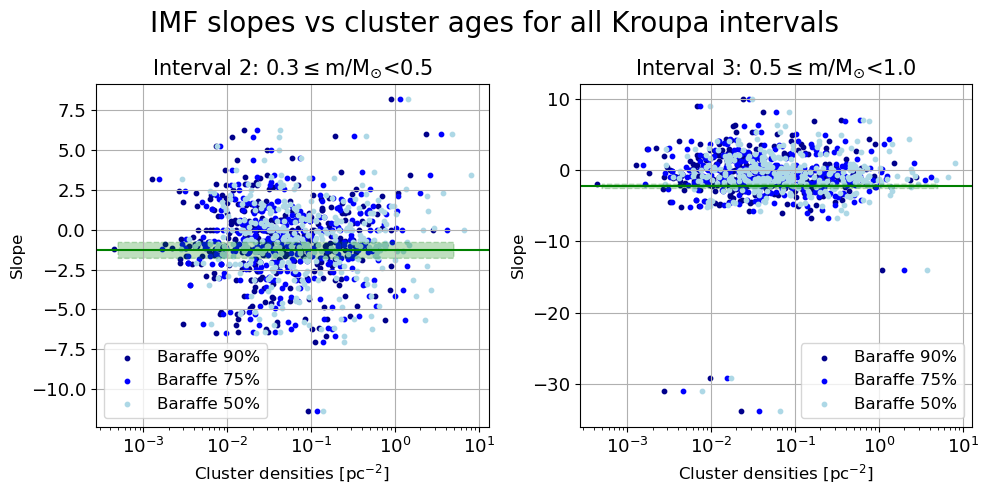

In [178]:
fig16, ax16 = plt.subplots(1, 2, figsize=(10, 5))

fig16.suptitle('IMF slopes vs cluster ages for all Kroupa intervals', fontsize=20)

colours_baraffe = ['darkblue', 'blue', 'lightblue']
colours_MIST = ['crimson', 'orangered', 'coral']


#for i, cl_dens in enumerate(densities_baraffe):
    
ax16[0].scatter(dens_baraffe['90_percent'][slope2_Baraffe], interval_slopes_Baraffe[1], c=colours_baraffe[0], 
                  s=10, alpha=1, label='Baraffe 90%')
#ax16[0, 0].scatter(densities_MIST[:, 0], interval_slopes_MIST[1], c=colours_MIST[0], 
#                  s=10, alpha=1, label='MIST 90%')
    
    
ax16[0].scatter(dens_baraffe['75_percent'][slope2_Baraffe], interval_slopes_Baraffe[1], c=colours_baraffe[1], 
                  s=10, alpha=1, label='Baraffe 75%')
#ax16[0, 0].scatter(densities_MIST[:, 1], interval_slopes_MIST[1], c=colours_MIST[1], 
#                  s=10, alpha=1, label='MIST 75%')

    
ax16[0].scatter(dens_baraffe['50_percent'][slope2_Baraffe], interval_slopes_Baraffe[1], c=colours_baraffe[2], 
                  s=10, alpha=1, label='Baraffe 50%')
#ax16[0, 0].scatter(densities_MIST[:, 2], interval_slopes_MIST[1], c=colours_MIST[2], 
#                  s=10, alpha=1, label='MIST 50%')
    
    

ax16[0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax16[0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax16[0].set_xlabel('Cluster densities [pc$^{-2}$]')
ax16[0].set_ylabel('Slope')
ax16[0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}') #interval_edges[1][0]
#ax16[0].set_xlim(8e-5, 9e0)
#ax16[0].set_ylim(-5, 5)

ax16[0].legend() #['90% Baraffe', '90% MIST', '75% Baraffe', '75% MIST', '50% Baraffe', '50% MIST']
ax16[0].set_xscale('log')




ax16[1].scatter(dens_baraffe['90_percent'][slope3_Baraffe], interval_slopes_Baraffe[2], c=colours_baraffe[0], 
                  s=10, alpha=1, label=f'Baraffe 90%')
#ax16[1].scatter(densities_MIST[:, 0], interval_slopes_MIST[2], c=colours_MIST[0], 
#                  s=10, alpha=1, label=f'MIST 90%')
    
    
ax16[1].scatter(dens_baraffe['75_percent'][slope3_Baraffe], interval_slopes_Baraffe[2], c=colours_baraffe[1], 
                  s=10, alpha=1, label=f'Baraffe 75%')
#ax16[1].scatter(densities_MIST[:, 1], interval_slopes_MIST[2], c=colours_MIST[1], 
#                  s=10, alpha=1, label=f'MIST 75%')
    
    
ax16[1].scatter(dens_baraffe['50_percent'][slope3_Baraffe], interval_slopes_Baraffe[2], c=colours_baraffe[2], 
                  s=10, alpha=1, label=f'Baraffe 50%')
#ax16[1].scatter(densities_MIST[:, 2], interval_slopes_MIST[2], c=colours_MIST[2], 
#                  s=10, alpha=1, label=f'MIST 90%')
    
    
    
ax16[1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax16[1].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax16[1].set_xlabel('Cluster densities [pc$^{-2}$]')
ax16[1].set_ylabel('Slope')
ax16[1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
#ax16[1].set_xlim(3e-4, 8e0)
#ax16[1].set_ylim(-5, 5)

ax16[1].legend()
ax16[1].set_xscale('log')



plt.tight_layout()
#plt.savefig('Plots/Slopes_vs_cluster_densities_baraffe_large.png')
plt.show()

### Plotting slopes vs densities MIST

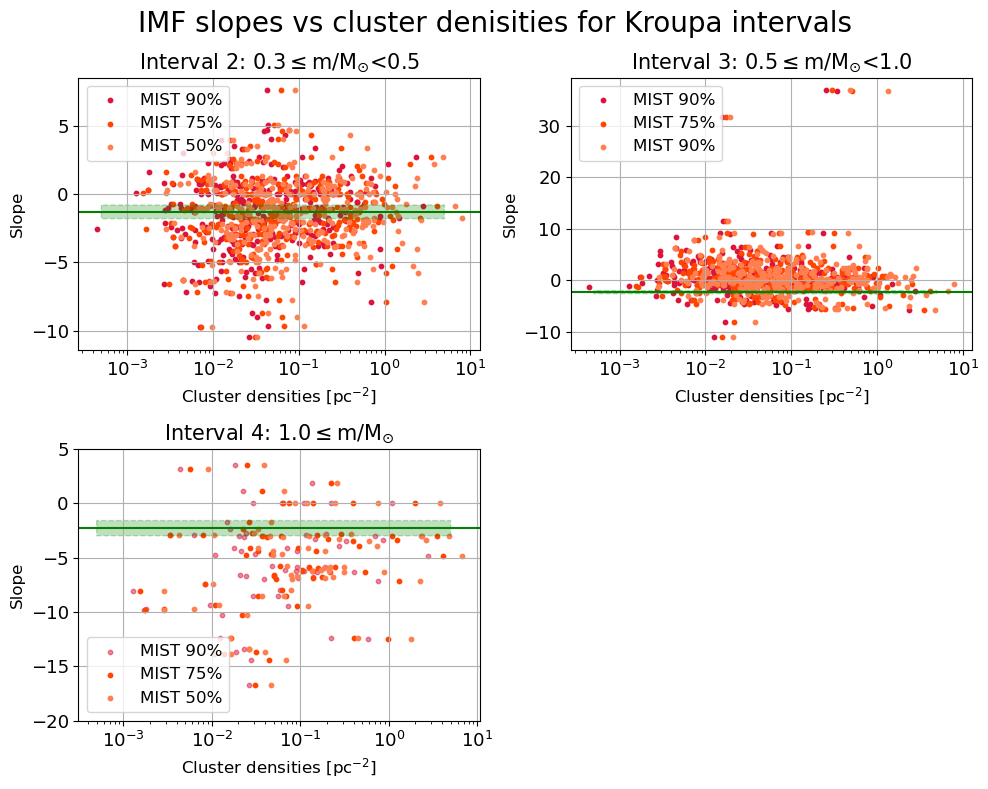

In [180]:
fig17, ax17 = plt.subplots(2, 2, figsize=(10, 8))

fig17.suptitle('IMF slopes vs cluster denisities for Kroupa intervals', fontsize=20)

colours_baraffe = ['darkblue', 'blue', 'lightblue']
colours_MIST = ['crimson', 'orangered', 'coral']


ax17[0, 0].scatter(dens_MIST['90_percent'][slope2_MIST], interval_slopes_MIST[1], c=colours_MIST[0], 
                  s=10, alpha=1, label='MIST 90%')
    
ax17[0, 0].scatter(dens_MIST['75_percent'][slope2_MIST], interval_slopes_MIST[1], c=colours_MIST[1], 
                  s=10, alpha=1, label='MIST 75%')

ax17[0, 0].scatter(dens_MIST['50_percent'][slope2_MIST], interval_slopes_MIST[1], c=colours_MIST[2], 
                  s=10, alpha=1, label='MIST 50%')
    
    

ax17[0, 0].axhline(kroupa_slopes[1], linestyle='solid', color='g')
ax17[0, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[1]-kroupa_slope_errors[1],
                     kroupa_slopes[1]+kroupa_slope_errors[1], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax17[0, 0].set_xlabel('Cluster densities [pc$^{-2}$]')
ax17[0, 0].set_ylabel('Slope')
ax17[0, 0].set_title(f'Interval 2: '+f'{0.3}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[1][1]:.3}') #interval_edges[1][0]
#ax17[0, 0].set_xlim(8e-5, 9e0)
#ax17[0, 0].set_ylim(-5, 5)

ax17[0, 0].legend() 
ax17[0, 0].set_xscale('log')




ax17[0, 1].scatter(dens_MIST['90_percent'][slope3_MIST], interval_slopes_MIST[2], c=colours_MIST[0], 
                  s=10, alpha=1, label=f'MIST 90%')
    
ax17[0, 1].scatter(dens_MIST['75_percent'][slope3_MIST], interval_slopes_MIST[2], c=colours_MIST[1], 
                  s=10, alpha=1, label=f'MIST 75%')
    
ax17[0, 1].scatter(dens_MIST['50_percent'][slope3_MIST], interval_slopes_MIST[2], c=colours_MIST[2], 
                  s=10, alpha=1, label=f'MIST 90%')
    
    
    
ax17[0, 1].axhline(kroupa_slopes[2], linestyle='solid', color='g')
ax17[0, 1].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[2]-kroupa_slope_errors[2],
                     kroupa_slopes[2]+kroupa_slope_errors[2], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax17[0, 1].set_xlabel('Cluster densities [pc$^{-2}$]')
ax17[0, 1].set_ylabel('Slope')
ax17[0, 1].set_title(f'Interval 3: '+f'{interval_edges[2][0]}'+r'$\leq$m/'+r'M$_{\odot}$<'+f'{interval_edges[2][1]:.3}')
#ax17[0, 1].set_xlim(3e-4, 8e0)
#ax17[0, 1].set_ylim(-5, 5)

ax17[0, 1].legend()
ax17[0, 1].set_xscale('log')





ax17[1, 0].scatter(dens_MIST['90_percent'][slope4_MIST], interval_slopes_MIST[3], c=colours_MIST[0], 
                  s=10, alpha=0.5, label=f'MIST 90%')
       
ax17[1, 0].scatter(dens_MIST['75_percent'][slope4_MIST], interval_slopes_MIST[3], c=colours_MIST[1], 
                  s=10, alpha=1, label=f'MIST 75%')
       
ax17[1, 0].scatter(dens_MIST['50_percent'][slope4_MIST], interval_slopes_MIST[3], c=colours_MIST[2], 
                  s=10, alpha=1, label=f'MIST 50%')
    

ax17[1, 0].axhline(kroupa_slopes[3], linestyle='solid', color='g')
ax17[1, 0].fill_between(np.linspace(0.0005, 5, 100000), kroupa_slopes[3]-kroupa_slope_errors[3],
                     kroupa_slopes[3]+kroupa_slope_errors[3], 
                     linestyle='dashed', color='g', alpha=0.25)
    
ax17[1, 0].set_xlabel('Cluster densities [pc$^{-2}$]')
ax17[1, 0].set_ylabel('Slope')
ax17[1, 0].set_title(f'Interval 4: '+f'{interval_edges[3][0]}'+r'$\leq$m/'+r'M$_{\odot}$')
ax17[1, 0].set_ylim(-20, 5)

ax17[1, 0].legend()
ax17[1, 0].set_xscale('log')

ax17[1, 1].remove()


plt.tight_layout()
#plt.savefig('Plots/Slopes_vs_cluster_densities_MIST_large.png')
plt.show()

## Distance uncertainty effect

### Making cluster data lists plus and minus the uncertainties

In [102]:
clusters_sep_pd_error, clusters_names = cluster_list(cluster_table, 1, 'gaia', '+')
clusters_sep_md_error, clusters_names = cluster_list(cluster_table, 1, 'gaia', '-')



del [clusters_sep_pd_error[310]] # Problems for MIST
del [clusters_sep_md_error[310]] # Problems for MIST
del [clusters_names[310]]

del [clusters_sep_pd_error[76]] # Problems for MIST
del [clusters_sep_md_error[76]] # Problems for MIST
del [clusters_names[76]]

del [clusters_sep_pd_error[71]] # Problems for Baraffe
del [clusters_sep_md_error[71]] # Problems for MIST
del [clusters_names[71]]

### Getting the masses Baraffe

In [103]:
%%time
cluster_log_counts_pd_Baraffe, cluster_log_edges_pd_Baraffe, cluster_masses_pd_Baraffe, cluster_ages_pd_Baraffe, same_as_1st_isochrone_pd = final_IMFs(clusters_sep_pd_error, clusters_names, tmass_clusters_sep, 'Baraffe', '0.00', 0.2, 
                                                                                                                                                        False, False, False, False, False)

print('Done')

Could not interpolate age for cluster 409.
Done
Wall time: 40.2 s


In [104]:
%%time
cluster_log_counts_md_Baraffe, cluster_log_edges_md_Baraffe, cluster_masses_md_Baraffe, cluster_ages_md_Baraffe, same_as_1st_isochrone_md = final_IMFs(clusters_sep_md_error, clusters_names, tmass_clusters_sep, 'Baraffe', '0.00', 0.2, 
                                                                                                                                                        False, False, False, False, False)

print('Done')

Could not interpolate age for cluster 409.
Done
Wall time: 30.6 s


In [105]:
print(clusters_sep[4]['dist_error'][0])
print(clusters_sep[4]['dist'][0])
print(len(clusters_sep[4]))

2.7397968010840636 pc
258.570556640625 pc
59


### Plotting histogram examples

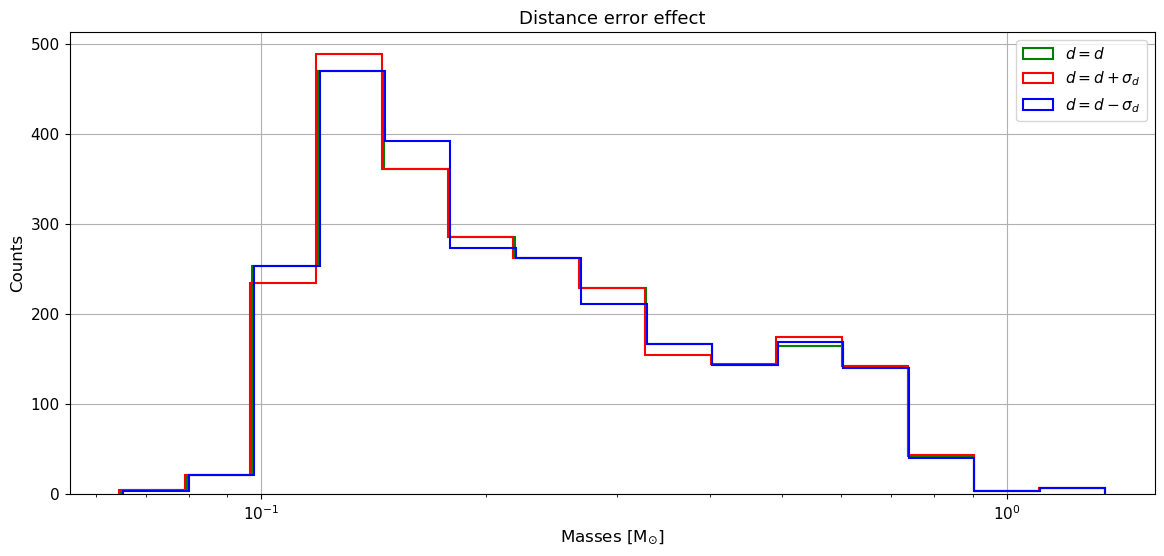

In [337]:
masses_d = cluster_masses_Baraffe[396]
masses_pd = cluster_masses_pd_Baraffe[396]
masses_md = cluster_masses_md_Baraffe[396]

min_mass_d = np.min(masses_d)
max_mass_d = np.max(masses_d)

min_mass_pd = np.min(masses_pd)
max_mass_pd = np.max(masses_pd)

min_mass_md = np.min(masses_md)
max_mass_md = np.max(masses_md)

nbins=15



fig4, ax4 = plt.subplots(figsize=(14, 6))

ax4.hist(masses_d, range=(np.log10(min_mass_d), np.log10(max_mass_d)), 
         bins=np.logspace(np.log10(min_mass_d), np.log10(max_mass_d), nbins+1), 
         histtype='step', fc=(0, 1, 0, 0.25), ec='g', lw=1.5, label=r'$d=d$')

ax4.hist(masses_pd, range=(np.log10(min_mass_pd), np.log10(max_mass_pd)), 
         bins=np.logspace(np.log10(min_mass_pd), np.log10(max_mass_pd), nbins+1), 
         histtype='step', fc=(1, 0, 0, 0.25), ec='r', lw=1.5, label=r'$d=d+\sigma_d$')

ax4.hist(masses_md, range=(np.log10(min_mass_md), np.log10(max_mass_md)), 
         bins=np.logspace(np.log10(min_mass_md), np.log10(max_mass_md), nbins+1), 
         histtype='step', fc=(0, 0, 1, 0.25), ec='b', lw=1.5, label=r'$d=d-\sigma_d$')



ax4.set_xlabel(r'Masses [M$_{\odot}$]')
ax4.set_ylabel('Counts')
ax4.set_title('Distance error effect')

ax4.legend()
ax4.set_xscale('log')

plt.show()

### Making slope calculations

In [107]:
%%time
cluster_bin_widths_pd_Baraffe, all_cluster_params_pd_Baraffe, cluster_kroupa_diff_pd_Baraffe, single_nonzero_bin_counter_pd_Baraffe = IMF_slopes(cluster_log_edges_pd_Baraffe, cluster_log_counts_pd_Baraffe, 
                                                                                                                                                     cluster_masses_pd_Baraffe, model='Baraffe', intervals='Kroupa', 
                                                                                                                                                     plot=False)

print('Done')

Done
Wall time: 594 ms


In [108]:
%%time
cluster_bin_widths_md_Baraffe, all_cluster_params_md_Baraffe, cluster_kroupa_diff_md_Baraffe, single_nonzero_bin_counter_md_Baraffe = IMF_slopes(cluster_log_edges_md_Baraffe, cluster_log_counts_md_Baraffe, 
                                                                                                                                                     cluster_masses_md_Baraffe, model='Baraffe', intervals='Kroupa', 
                                                                                                                                                     plot=False)

print('Done')

Done
Wall time: 868 ms


In [223]:
#print(all_cluster_params_Baraffe[:, 0, 2])

In [197]:
has_slopes = []

slope1 = []
slope2 = []
slope3 = []
slope4 = []

for i, cluster_slopes in enumerate(all_cluster_params_Baraffe):
    #isnan_mask = np.isnan(cluster_slopes)==True
    notnan_mask = np.isnan(cluster_slopes[0, :])==False
    
    slope_numbers = np.array([1, 2, 3, 4])
    which_slopes = slope_numbers[notnan_mask]
    
    has_slopes.append(which_slopes)
    
    if any(which_slopes==1):
        slope1.append(i)
        
    if any(which_slopes==2):
        slope2.append(i)
        
    if any(which_slopes==3):
        slope3.append(i)
        
    if any(which_slopes==4):
        slope4.append(i)
        
        
    #print('--------------------------------------')
    

In [199]:
#print(slope3)

In [217]:
slopes_pdiff = np.abs((all_cluster_params_pd_Baraffe - all_cluster_params_Baraffe)/all_cluster_params_Baraffe)

slopes_mdiff = np.abs((all_cluster_params_md_Baraffe - all_cluster_params_Baraffe)/all_cluster_params_Baraffe)

pdiffs_len = []
pdiffs = []

for i, slope in enumerate(slopes_pdiff.T):
    slopes = slope[0, :]
    
    nan_mask = np.isnan(slopes)==False
    cluster_slopes = slopes[nan_mask]
    
    pdiffs_len.append(len(cluster_slopes))
    #nan_id_mask = np.isnan(slope)==True
    
    if len(cluster_slopes)==0:
        continue
        
    else:
        pdiffs.append(cluster_slopes)
        
        
        
        
mdiffs_len = []
mdiffs = []

for i, slope in enumerate(slopes_mdiff.T):
    slopes = slope[0, :]
    
    nan_mask = np.isnan(slopes)==False
    cluster_slopes = slopes[nan_mask]
    
    mdiffs_len.append(len(cluster_slopes))
    #nan_id_mask = np.isnan(slope)==True
    
    if len(cluster_slopes)==0:
        continue
        
    else:
        mdiffs.append(cluster_slopes)
        



print(pdiffs_len)
#print('-------------------------------------------------------------------------------')
print(mdiffs_len)
print()


pdiff_means = [np.mean(diffs) for diffs in pdiffs]
mdiff_means = [np.mean(diffs) for diffs in mdiffs]

print(pdiff_means)
print(mdiff_means)

[107, 670, 562, 0]
[107, 669, 560, 0]

[1915678.471543084, 71433.98666724448, 2929644.73231837]
[603261.4112826973, 94.42422939695484, 3051951.8095817626]


In [338]:
diff_mask = pdiffs[2]<1e1
large_diff_mask = pdiffs[2]>1e1

pdiffs2_small = pdiffs[2][diff_mask]
pdiffs2_large = pdiffs[2][large_diff_mask]

weird_pd_pos = np.array([i for i, val in enumerate(pdiffs[2]) if any(val==pdiffs2_large)==True]) 

print(f'Length pdiff tot = {len(pdiffs[2])}')
print(f'Length pdiff small vals = {len(pdiffs2_small)}')
print(f'Mean of small pdiff vals = {np.mean(pdiffs2_small)}')


print(f'Large pdiff values = {pdiffs2_large}')
print(f'Positions of weird values = {weird_pd_pos}')
print('-------------------------------------------')
print()




diff_mask = mdiffs[2]<1e1
large_mdiff_mask = mdiffs[2]>1e1

mdiffs2_small = mdiffs[2][diff_mask]
mdiffs2_large = mdiffs[2][large_mdiff_mask]

weird_md_pos = np.array([i for i, val in enumerate(mdiffs[2]) if any(val==mdiffs2_large)==True])

print(f'Length mdiff tot = {len(mdiffs[2])}')
print(f'Length mdiff small vals = {len(mdiffs2_small)}')
print(f'Mean of small mdiff vals = {np.mean(mdiffs2_small)}')

print(f'Large pdiff values = {mdiffs2_large}')
print(f'Positions of weird values = {weird_md_pos}')

print('-------------------------------------------')
print()








weird_pdiff_n = [len(clusters_sep[i]) for i in weird_pd_pos]
weird_mdiff_n = [len(clusters_sep[i]) for i in weird_md_pos]

print(weird_pdiff_n)
print(weird_mdiff_n)

Length pdiff tot = 562
Length pdiff small vals = 549
Mean of small pdiff vals = 0.39311136395890534
Large pdiff values = [4.87810838e+01 1.20839744e+08 1.12254414e+03 2.43301801e+07
 1.04998557e+09 5.59794519e+03 5.53921128e+07 1.25747085e+04
 3.88937070e+08 6.73299152e+06 9.55823420e+03 1.21475397e+05
 9.20812609e+04]
Positions of weird values = [ 76 124 257 269 272 280 307 308 336 355 399 439 549]
-------------------------------------------

Length mdiff tot = 560
Length mdiff small vals = 537
Mean of small mdiff vals = 0.4239029873890554
Large pdiff values = [1.04994549e+01 6.96747379e+07 1.34010871e+01 2.42424031e+08
 3.74622784e+05 3.30031215e+03 1.79202042e+08 3.61559534e+08
 2.15866600e+08 1.06347242e+08 5.12276258e+03 1.03070180e+07
 3.27550366e+07 1.09474980e+03 8.53364946e+07 2.91246348e+03
 1.90613659e+08 3.15829554e+03 8.26846338e+07 7.18885638e+03
 1.97153215e+05 1.31647391e+08 7.97887539e+04]
Positions of weird values = [ 20  31  54  66  76 119 124 154 171 189 242 253 267

In [269]:
diff_mask_p1 = pdiffs[0]<1e1
diff_mask_p2 = pdiffs[1]<1e1
diff_mask_p3 = pdiffs[2]<1e1

diffs_p1 = pdiffs[0][diff_mask_p1]
diffs_p2 = pdiffs[1][diff_mask_p2]
diffs_p3 = pdiffs[2][diff_mask_p3]
print('Average difference for plus sigma')
print(np.mean(diffs_p1)*100)
print(np.mean(diffs_p2)*100)
print(np.mean(diffs_p3)*100)
print()


diff_mask_m1 = mdiffs[0]<1e1
diff_mask_m2 = mdiffs[1]<1e1
diff_mask_m3 = mdiffs[2]<1e1

diffs_m1 = mdiffs[0][diff_mask_m1]
diffs_m2 = mdiffs[1][diff_mask_m2]
diffs_m3 = mdiffs[2][diff_mask_m3]

print('Average difference for minus sigma')
print(np.mean(diffs_m1)*100)
print(np.mean(diffs_m2)*100)
print(np.mean(diffs_m3)*100)

Average difference for plus sigma
19.91261451666227
21.026475521583425
39.311136395890536

Average difference for minus sigma
24.71724650578902
24.524671789691777
42.39029873890554


### Plotting slope histograms for $+\sigma_d$

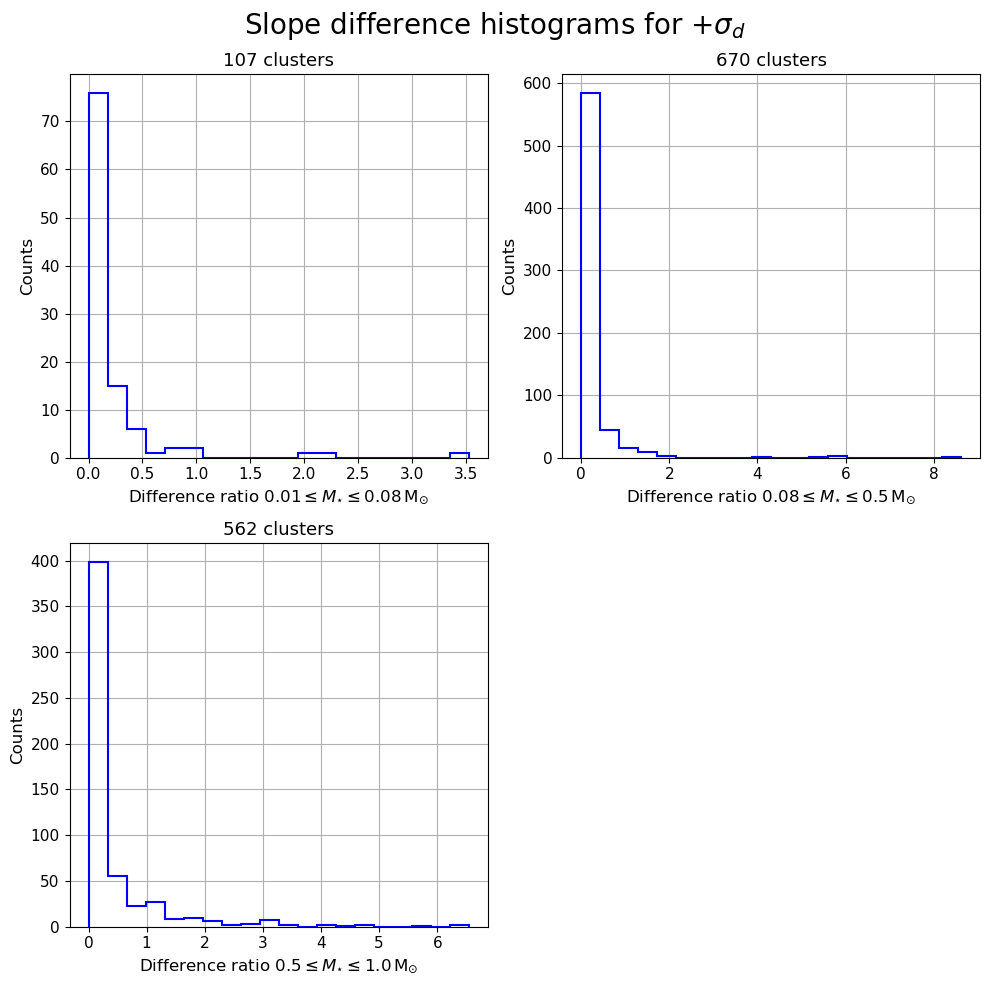

In [244]:
fig5, ax5 = plt.subplots(2, 2, figsize=(10, 10))

nbins = 20

fig5.suptitle(r'Slope difference histograms for $+\sigma_d$', fontsize=20)

ax5[0,0].hist(diffs_p1, bins=nbins, histtype='step', ec='b', lw=1.5)

ax5[0,0].set_xlabel(r'Difference ratio $0.01 \leq M_{\star} \leq 0.08 \,$M$_{\odot}$')
ax5[0,0].set_ylabel('Counts')
ax5[0,0].set_title(f'{len(pdiffs[0])} clusters')


ax5[0,1].hist(diffs_p2, bins=nbins, histtype='step', ec='b', lw=1.5)

ax5[0,1].set_xlabel(r'Difference ratio $0.08 \leq M_{\star} \leq 0.5 \,$M$_{\odot}$')
ax5[0,1].set_ylabel('Counts')
ax5[0,1].set_title(f'{len(pdiffs[1])} clusters')



ax5[1,0].hist(diffs_p3, bins=nbins, histtype='step', ec='b', lw=1.5)

ax5[1,0].set_xlabel(r'Difference ratio $0.5 \leq M_{\star} \leq 1.0 \,$M$_{\odot}$')
ax5[1,0].set_ylabel('Counts')
ax5[1,0].set_title(f'{len(pdiffs[2])} clusters')


ax5[1, 1].remove()
#ax5[1,1].hist(slopes_pdiff[:, 0, 3], bins=nbins, histtype='step', ec='b', lw=1.5)

#ax5[1,1].set_xlabel(r'Difference ratio $1.0 \leq M_{\star}\,$M$_{\odot}$')
#ax5[1,1].set_ylabel('Counts')



plt.tight_layout()
plt.show()

### Plotting slope histograms for $-\sigma_d$

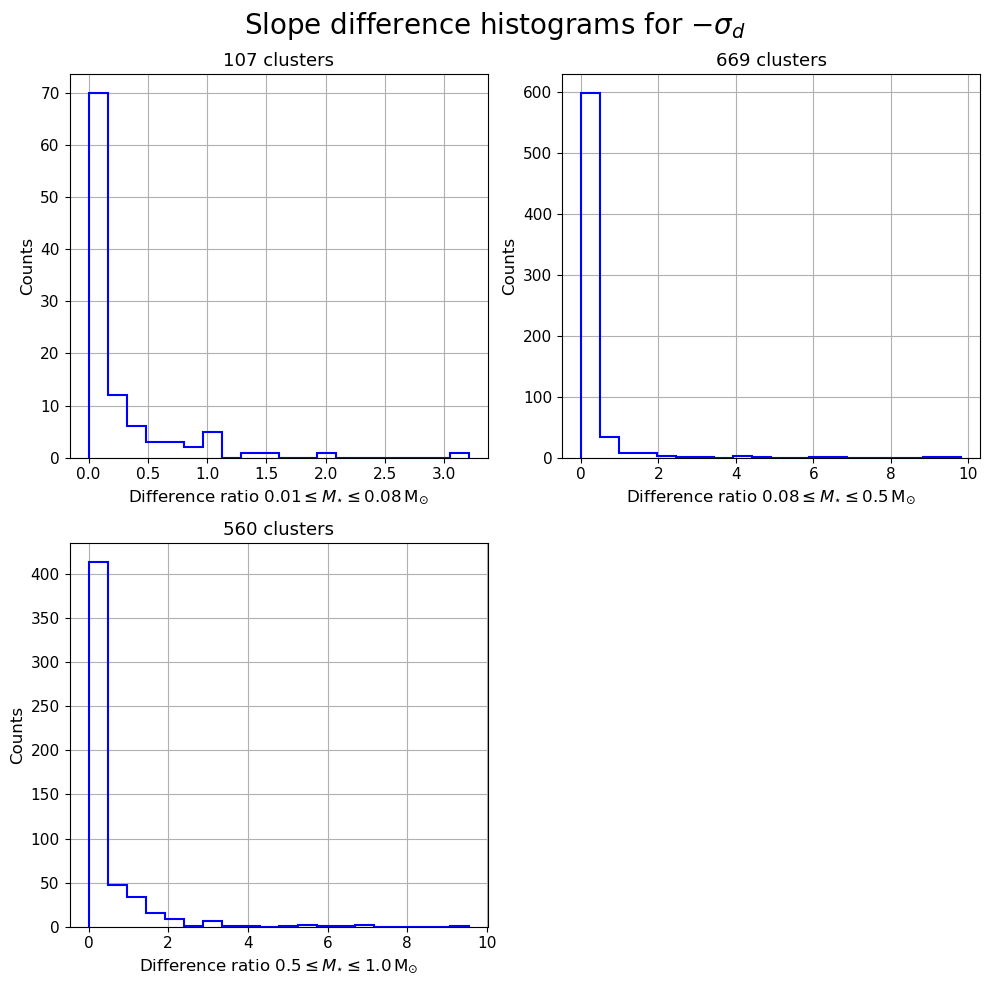

In [248]:
fig6, ax6 = plt.subplots(2, 2, figsize=(10, 10))

nbins = 20

fig6.suptitle(r'Slope difference histograms for $-\sigma_d$', fontsize=20)

ax6[0,0].hist(diffs_m1, bins=nbins, histtype='step', ec='b', lw=1.5)

ax6[0,0].set_xlabel(r'Difference ratio $0.01 \leq M_{\star} \leq 0.08 \,$M$_{\odot}$')
ax6[0,0].set_ylabel('Counts')
ax6[0,0].set_title(f'{len(mdiffs[0])} clusters')


ax6[0,1].hist(diffs_m2, bins=nbins, histtype='step', ec='b', lw=1.5)

ax6[0,1].set_xlabel(r'Difference ratio $0.08 \leq M_{\star} \leq 0.5 \,$M$_{\odot}$')
ax6[0,1].set_ylabel('Counts')
ax6[0,1].set_title(f'{len(mdiffs[1])} clusters')



ax6[1,0].hist(diffs_m3, bins=nbins, histtype='step', ec='b', lw=1.5)

ax6[1,0].set_xlabel(r'Difference ratio $0.5 \leq M_{\star} \leq 1.0 \,$M$_{\odot}$')
ax6[1,0].set_ylabel('Counts')
ax6[1,0].set_title(f'{len(mdiffs[2])} clusters')


ax6[1, 1].remove()
#ax5[1,1].hist(slopes_pdiff[:, 0, 3], bins=nbins, histtype='step', ec='b', lw=1.5)

#ax5[1,1].set_xlabel(r'Difference ratio $1 \leq M_{\star}\,$M$_{\odot}$')
#ax5[1,1].set_ylabel('Counts')



plt.tight_layout()
plt.show()

### Getting the masses MIST

In [133]:
%%time
cluster_log_counts_pd_MIST, cluster_log_edges_pd_MIST, cluster_masses_pd_MIST, cluster_ages_pd_MIST, same_as_1st_isochrone_pd = final_IMFs(clusters_sep_pd_error, clusters_names, tmass_clusters_sep, 'MIST', '0.00', 0.2, 
                                                                                                                                                        False, False, False, False, False)

print('Done')

Done
Wall time: 2min 21s


In [134]:
%%time
cluster_log_counts_md_MIST, cluster_log_edges_md_MIST, cluster_masses_md_MIST, cluster_ages_md_MIST, same_as_1st_isochrone_md = final_IMFs(clusters_sep_md_error, clusters_names, tmass_clusters_sep, 'MIST', '0.00', 0.2, 
                                                                                                                                                        False, False, False, False, False)

print('Done')

Done
Wall time: 2min 18s


### Plotting histogram examples

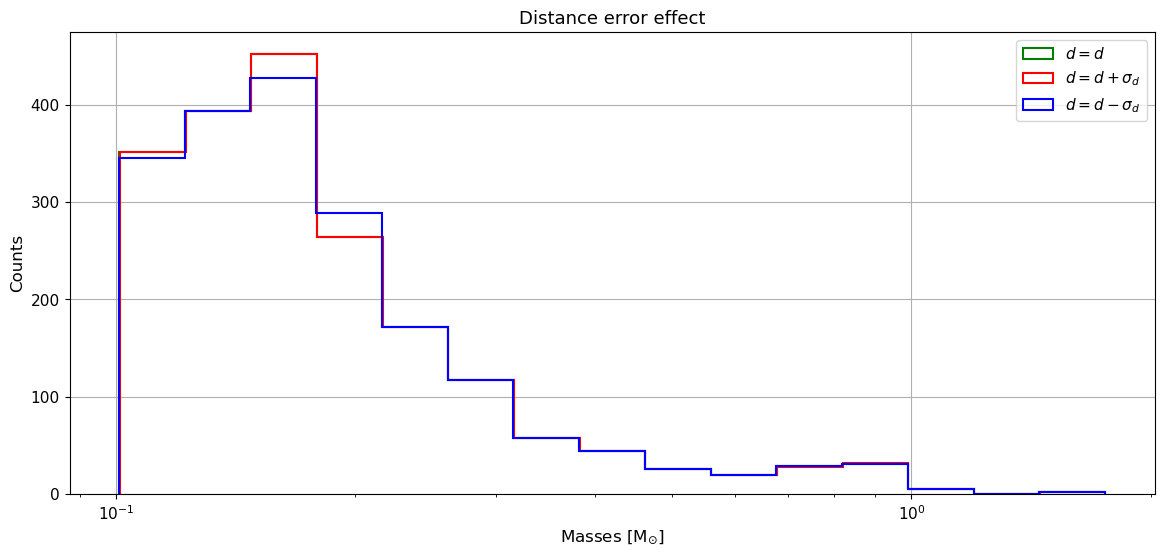

In [136]:
masses_d = cluster_masses_MIST[0]
masses_pd = cluster_masses_pd_MIST[0]
masses_md = cluster_masses_md_MIST[0]

min_mass_d = np.min(masses_d)
max_mass_d = np.max(masses_d)

min_mass_pd = np.min(masses_pd)
max_mass_pd = np.max(masses_pd)

min_mass_md = np.min(masses_md)
max_mass_md = np.max(masses_md)

nbins=15



fig6, ax6 = plt.subplots(figsize=(14, 6))

ax6.hist(masses_d, range=(np.log10(min_mass_d), np.log10(max_mass_d)), 
         bins=np.logspace(np.log10(min_mass_d), np.log10(max_mass_d), nbins+1), 
         histtype='step', fc=(0, 1, 0, 0.25), ec='g', lw=1.5, label=r'$d=d$')

ax6.hist(masses_pd, range=(np.log10(min_mass_pd), np.log10(max_mass_pd)), 
         bins=np.logspace(np.log10(min_mass_pd), np.log10(max_mass_pd), nbins+1), 
         histtype='step', fc=(1, 0, 0, 0.25), ec='r', lw=1.5, label=r'$d=d+\sigma_d$')

ax6.hist(masses_md, range=(np.log10(min_mass_md), np.log10(max_mass_md)), 
         bins=np.logspace(np.log10(min_mass_md), np.log10(max_mass_md), nbins+1), 
         histtype='step', fc=(0, 0, 1, 0.25), ec='b', lw=1.5, label=r'$d=d-\sigma_d$')



ax6.set_xlabel(r'Masses [M$_{\odot}$]')
ax6.set_ylabel('Counts')
ax6.set_title('Distance error effect')

ax6.legend()
ax6.set_xscale('log')

plt.show()

### Making slope calculations

In [137]:
%%time
cluster_bin_widths_pd_MIST, all_cluster_params_pd_MIST, cluster_kroupa_diff_pd_MIST, single_nonzero_bin_counter_pd_MIST = IMF_slopes(cluster_log_edges_pd_MIST, cluster_log_counts_pd_MIST, 
                                                                                                                                                     cluster_masses_pd_MIST, model='MIST', intervals='Kroupa', 
                                                                                                                                                     plot=False)

print('Done')

Done
Wall time: 656 ms


In [138]:
%%time
cluster_bin_widths_md_MIST, all_cluster_params_md_MIST, cluster_kroupa_diff_md_MIST, single_nonzero_bin_counter_md_MIST = IMF_slopes(cluster_log_edges_md_MIST, cluster_log_counts_md_MIST, 
                                                                                                                                                     cluster_masses_md_MIST, model='MIST', intervals='Kroupa', 
                                                                                                                                                     plot=False)

print('Done')

Done
Wall time: 706 ms


In [139]:
slopes_pdiff = np.abs((all_cluster_params_pd_MIST - all_cluster_params_MIST)/all_cluster_params_MIST)

slopes_mdiff = np.abs((all_cluster_params_md_MIST - all_cluster_params_MIST)/all_cluster_params_MIST)

pdiffs_len = []
pdiffs = []

for i, slope in enumerate(slopes_pdiff.T):
    nan_mask = np.isnan(slope)==False
    cluster_slopes = slope[nan_mask]
    pdiffs_len.append(len(cluster_slopes))
    
    if len(cluster_slopes)==0:
        continue
        
    else:
        pdiffs.append(cluster_slopes)
        
        
        
mdiffs_len = []
mdiffs = []

for i, slope in enumerate(slopes_mdiff.T):
    nan_mask = np.isnan(slope)==False
    cluster_slopes = slope[nan_mask]
    mdiffs_len.append(len(cluster_slopes))
    
    if len(cluster_slopes)==0:
        continue
        
    else:
        mdiffs.append(cluster_slopes)



print(pdiffs_len)
#print('-------------------------------------------------------------------------------')
print(mdiffs_len)
print()

for diffs in pdiffs:
    print(diffs)

pdiff_means = [np.mean(diffs) for diffs in pdiffs]
mdiff_means = [np.mean(diffs) for diffs in mdiffs]

print(pdiff_means)
print(mdiff_means)

[0, 1344, 1016, 120]
[0, 1344, 1002, 118]

[0.00060936 0.01041166 0.06043535 ... 0.03073353 0.12828188 0.07885658]
[1.00018474 0.27448281 0.06929684 ... 0.12876833 0.31135056 0.0095141 ]
[6.10037549e-04 2.79302366e-03 3.41308905e-01 4.66617634e+08
 1.24545236e-04 1.91150694e-02 2.71801673e-01 1.37719042e-02
 3.86691424e-02 4.40899552e-01 2.18432003e-01 1.48121499e-03
 3.01954537e-01 3.19039064e-03 1.30502603e+01 8.77160473e-04
 4.97768190e-02 1.01140224e-04 2.85247262e-03 1.52845973e-01
 4.90620247e-01 5.29933728e-04 1.33686106e-01 2.12212408e-05
 4.23373816e-04 3.24615673e-03 1.03221200e-04 1.67948811e-01
 1.13183226e-04 2.76310661e-02 2.59767838e-03 3.87010785e-01
 3.61602706e-03 9.74287747e-03 1.38048209e-03 9.18755109e-01
 5.30888697e-04 4.25013554e-02 7.01006205e-02 2.77167080e-02
 2.22455807e-01 3.14575016e-01 7.27895230e-02 5.72953143e-01
 2.82088669e-03 9.12695911e-02 3.12851890e-03 1.99981984e-01
 1.01482216e-01 2.01268110e-01 7.34361330e-02 3.44280004e-03
 1.21648131e-03 7.92

In [140]:
diff_mask = pdiffs[2]<5e1
large_diff_mask = pdiffs[2]>5e1

pdiffs2_small = pdiffs[2][diff_mask]
pdiffs2_large = pdiffs[2][large_diff_mask]

print(len(pdiffs[2]))
print(len(pdiffs2_small))
print(pdiffs2_large)

print(np.mean(pdiffs2_small))



diff_mask = mdiffs[2]<5e1

mdiffs2_small = mdiffs[2][diff_mask]

print(len(mdiffs[2]))
print(len(mdiffs2_small))

print(np.mean(mdiffs2_small))

120
119
[4.66617634e+08]
0.2970167209670331
118
117
0.2523560856644149
